# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mohamad Thoriq Abdurachman
- **Email:** mohamadthoriq09@gmail.com
- **ID Dicoding:** thoriq09

## Menentukan Pertanyaan Bisnis

- Apa kategori produk dengan penjualan tertinggi berdasarkan jumlah item yang terjual?
- Apa pola ulasan pelanggan terhadap pesanan dengan nilai bintang rendah?
- Siapa saja penjual dengan performa terbaik berdasarkan jumlah penjualan?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install geopandas folium streamlit wordcloud plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import geopandas as gpd
from geopandas.tools import geocode
import folium
from datetime import datetime
import streamlit as st
from wordcloud import WordCloud
import plotly.express as px

In [3]:
 pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.16.0.35.48
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.29.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.1
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.12.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.88
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.31.2
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy=

## Data Wrangling

### Gathering Data

In [4]:
order_items_df = pd.read_csv ("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Fungsi:**
Berisi rincian barang yang dipesan.

In [5]:
products_df = pd.read_csv ("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Fungsi:**
Menyediakan informasi produk.

In [6]:
reviews_df = pd.read_csv ("order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Fungsi:**
Berisi ulasan pelanggan.

In [7]:
sellers_df = pd.read_csv ("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Fungsi:**
Berisi informasi penjual.

In [8]:
orders_df = pd.read_csv ("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Fungsi:**
Berisi informasi terkait pesanan.

In [9]:
geoloc_df = pd.read_csv ("geolocation_dataset.csv")
geoloc_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Fungsi:**
Berisi data lokasi geografis.

In [10]:
customers_df = pd.read_csv ("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Fungsi:**
Berisi informasi pelanggan.

In [11]:
payments_df = pd.read_csv ("order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Fungsi:**
Berisi detail pembayaran.

### Assessing Data

####Menilai Tabel order_items_df

Informasi Tabel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Statistik Deskriptif:
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.0000

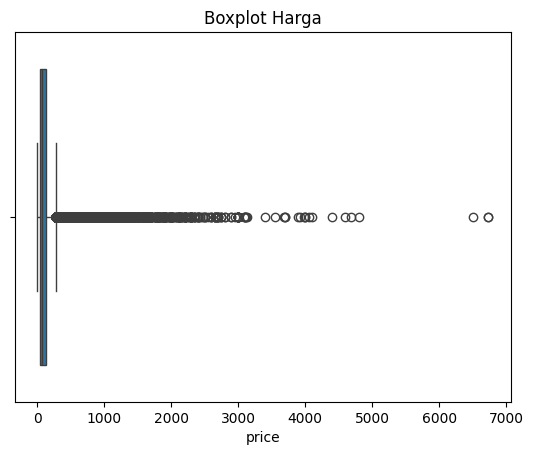

In [12]:
print("Informasi Tabel:")
print(order_items_df.info())
print("\nStatistik Deskriptif:")
print(order_items_df.describe())
print("\nJumlah Nilai Kosong:")
print(order_items_df.isnull().sum())
print("\nJumlah Baris Duplikat:")
print(order_items_df.duplicated().sum())
print("\nMengecek Harga Negatif (Kurang Dari 0):")
print(order_items_df[order_items_df['price'] < 0])
print("\nVisualisasi Outlier Kolom 'price':")
sns.boxplot(data=order_items_df, x='price')
plt.title("Boxplot Harga")
plt.show()

**Insight:**
- Tidak ada nilai kosong.
- Tidak ada duplikasi data.
- Tidak ada harga bernilai negatif.
- Menunjukkan potensi outlier, karena harga produk memiliki nilai maksimum yang sangat tinggi dan melebihi nilai pada kuartil tiga. Selain itu, biaya pengiriman juga memiliki nilai maksimum yang sangat tinggi dan melebihi nilai pada kuartil tiga.

####Menilai Tabel products_df

In [13]:
print("Informasi Tabel:")
print(products_df.info())
print("\nJumlah Nilai Kosong:")
print(products_df.isnull().sum())
print("\nJumlah Baris Duplikat:")
print(products_df.duplicated().sum())
print("\nKategori Produk Unik:")
print("Jumlah =", products_df['product_category_name'].nunique())
print(products_df['product_category_name'].unique())

Informasi Tabel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Jumlah Nilai Kosong:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610

**Insight:**
- Terdapat kolom yang memiliki nilai kosong.
- Tidak ada duplikasi data.
- Terdapat nilai nan pada kategori produk.

####Menilai Tabel reviews_df

Informasi Tabel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Jumlah Nilai Kosong:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah Baris Duplikat:
0

Statistik Skor Ulasan:
count    99224.000000
mean 

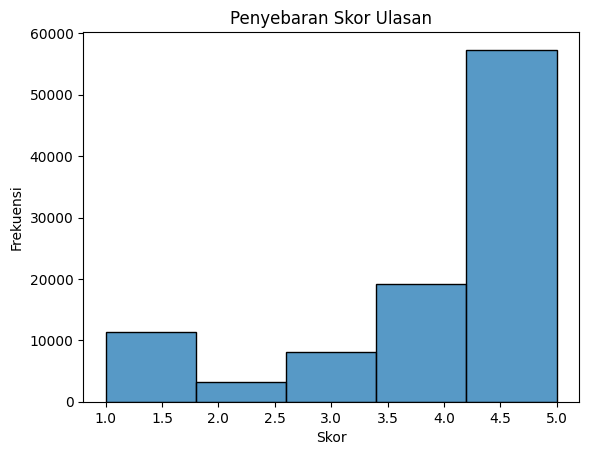

In [14]:
print("Informasi Tabel:")
print(reviews_df.info())
print("\nJumlah Nilai Kosong:")
print(reviews_df.isnull().sum())
print("\nJumlah Baris Duplikat:")
print(reviews_df.duplicated().sum())
print("\nStatistik Skor Ulasan:")
print(reviews_df['review_score'].describe())
print("\nVisualisasi Penyebaran Skor Ulasan:")
sns.histplot(reviews_df['review_score'], bins=5, kde=False)
plt.title("Penyebaran Skor Ulasan")
plt.xlabel("Skor")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Terdapat kolom dengan nilai kosong yang jumlahnya cukup banyak.
- Tidak ada duplikasi data.
- Skor ulasan yang cenderung tinggi menunjukkan adanya kemungkinan bias data.

####Menilai Tabel sellers_df

In [15]:
print("Informasi Tabel:")
print(sellers_df.info())
print("\nJumlah Nilai Kosong:")
print(sellers_df.isnull().sum())
print("\nJumlah Baris Duplikat:")
print(sellers_df.duplicated().sum())
print("\nValidasi Lokasi Penjual:")
print("Jumlah =", sellers_df['seller_zip_code_prefix'].nunique())
print(sellers_df['seller_zip_code_prefix'].unique())

Informasi Tabel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Jumlah Nilai Kosong:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah Baris Duplikat:
0

Validasi Lokasi Penjual:
Jumlah = 2246
[13023 13844 20031 ...  4650 96080 12051]


**Insight:**
- Tidak ada kolom dengan nilai kosong.
- Tidak ada duplikasi data.
- Banyaknya jumlah lokasi penjual menunjukkan distribusi lokasi penjual yang beragam.
- Tabel sudah bersih dan dapat digunakan.

####Menilai Tabel orders_df

In [16]:
print("Informasi Tabel:")
print(orders_df.info())
print("\nJumlah Nilai Kosong:")
print(orders_df.isnull().sum())
print("\nJumlah Baris Duplikat:")
print(orders_df.duplicated().sum())
print("\nValidasi Status Pesanan:")
print("Jumlah =", orders_df['order_status'].nunique())
print(orders_df['order_status'].unique())

Informasi Tabel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Jumlah Nilai Kosong:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date

**Insight:**
- Terdapat kolom dengan nilai kosong.
- Tidak ada dupilkasi data.
- Terdapat 8 kategori status pesanan.

####Menilai Tabel geoloc_df

In [17]:
print("Informasi Tabel:")
print(geoloc_df.info())
print("\nJumlah Nilai Kosong:")
print(geoloc_df.isnull().sum())
print("\nJumlah Baris Duplikat:")
print(geoloc_df.duplicated().sum())
print("\nValidasi Kode Pos Unik:")
print("Jumlah =", geoloc_df['geolocation_zip_code_prefix'].nunique())
print(geoloc_df['geolocation_zip_code_prefix'].unique())

Informasi Tabel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Jumlah Nilai Kosong:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah Baris Duplikat:
261831

Validasi Kode Pos Unik:
Jumlah = 19015
[ 1037  1046  1041 ... 99910 99920 99952]


**Insight:**
- Tidak ada kolom dengan nilai kosong.
- Terdapat duplikasi data berdasarkan semua kolom.

####Menilai Tabel customers_df

In [18]:
print("Informasi Tabel:")
print(customers_df.info())
print("\nJumlah Nilai Kosong:")
print(customers_df.isnull().sum())
print("\nJumlah Baris Duplikat:")
print(customers_df.duplicated().sum())
print("\nValidasi ID Pelanggan:")
print("Jumlah =", customers_df['customer_id'].nunique())
print(customers_df['customer_id'].unique())

Informasi Tabel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Jumlah Nilai Kosong:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah Baris Duplikat:
0

Validasi ID Pelanggan:
Jumlah = 99441
['06b8999e2fba1a1fbc88172c00ba8bc7' '18955e83d337fd6b2def6b18a428ac77'
 '4e7b3e00288586ebd08712fdd0374a03' ... '5e28dfe12db7fb50a4b2f691faecea5e'
 '56b18e2166679b8a959d72dd06da27f9' '274fa6071

**Insight:**
- Tidak terdapat kolom dengan nilai kosong.
- Tidak ada dupilkasi data.
- Tabel sudah bersih dan dapat digunakan.

####Menilai Tabel payments_df

Informasi Tabel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Jumlah Nilai Kosong:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah Baris Duplikat:
0

Statistik Jumlah Pembayaran:
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64



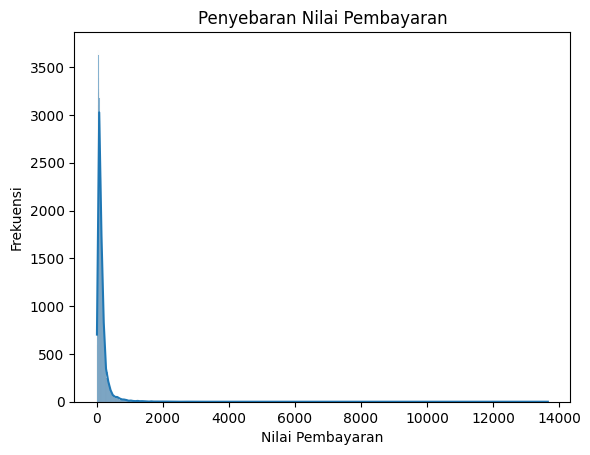

In [19]:
print("Informasi Tabel:")
print(payments_df.info())
print("\nJumlah Nilai Kosong:")
print(payments_df.isnull().sum())
print("\nJumlah Baris Duplikat:")
print(payments_df.duplicated().sum())
print("\nStatistik Jumlah Pembayaran:")
print(payments_df['payment_value'].describe())
print("\nVisualisasi Penyebaran Nilai Pembayaran:")
sns.histplot(payments_df['payment_value'], kde=True)
plt.title("Penyebaran Nilai Pembayaran")
plt.xlabel("Nilai Pembayaran")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Tidak terdapat kolom dengan nilai kosong.
- Tidak ada dupilkasi data.
- Menunjukkan potensi outlier, karena kolom 'payment_value' memiliki nilai maksimum yang sangat tinggi dan melebihi nilai pada kuartil tiga.

### Cleaning Data

####Membersihkan Tabel order_items_df

In [20]:
#Mengatasi Potensi Outlier
Q1_price = order_items_df['price'].quantile(0.25)
Q3_price = order_items_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_fr = order_items_df['freight_value'].quantile(0.25)
Q3_fr = order_items_df['freight_value'].quantile(0.75)
IQR_fr = Q3_fr - Q1_fr

#Filter Outlier
cleaned_order_items_df = order_items_df[
    (order_items_df['price'] >= (Q1_price - 1.5 * IQR_price)) &
    (order_items_df['price'] <= (Q3_price + 1.5 * IQR_price)) &
    (order_items_df['freight_value'] >= (Q1_fr - 1.5 * IQR_fr)) &
    (order_items_df['freight_value'] <= (Q3_fr + 1.5 * IQR_fr))
]

print("Statistik Deskriptif Setelah Dibersihkan:")
cleaned_order_items_df.describe()

Statistik Deskriptif Setelah Dibersihkan:


,order_item_id,price,freight_value
count,95092.000000,95092.000000,95092.000000
mean,1.205885,79.614581,15.884044
std,0.719299,56.195330,5.363266
min,1.000000,0.850000,0.980000
25%,1.000000,35.900000,12.690000
50%,1.000000,62.000000,15.380000
75%,1.000000,109.900000,18.450000
max,21.000000,277.000000,33.250000


**Insight:**
Membersihkan outlier yang ada pada kolom 'price' dan 'freight_value'.

####Membersihkan Tabel products_df

In [21]:
#Menyalin DataFrame
cleaned_products_df = products_df.copy()

# Mengisi Nilai Kosong
if 'product_category_name' in cleaned_products_df.columns:
    cleaned_products_df['product_category_name'] = cleaned_products_df['product_category_name'].fillna('unknown')

cleaned_products_df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']] = cleaned_products_df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']].fillna(0)

# Menghapus Baris dengan Nilai Kosong pada Kolom Ukuran Produk
important_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
cleaned_products_df = cleaned_products_df.dropna(subset=important_columns)
cleaned_products_df

print(cleaned_products_df.head())
print("\nJumlah Nilai Kosong Setelah Pembersihan:")
print(cleaned_products_df.isna().sum())
print("\nKategori Produk Unik Setelah Pembersihan:")
print("Jumlah =", cleaned_products_df['product_category_name'].nunique())
print(cleaned_products_df['product_category_name'].unique())


                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

**Insight:**
- Nilai kosong pada kolom kategori diisi dengan 'unknown'.
- Kolom dimensi produk yang kosong dihapus.

####Membersihkan Tabel reviews_df



In [22]:
#Menyalin DataFrame
cleaned_reviews_df = reviews_df.copy()

#Mengisi Nilai Kosong
cleaned_reviews_df[['review_comment_title', 'review_comment_message']] = cleaned_reviews_df[['review_comment_title', 'review_comment_message']].fillna('')

print(cleaned_reviews_df.head())
print("\nJumlah Nilai Kosong Setelah Pembersihan:")
print(cleaned_reviews_df.isna().sum())


                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                        
1             5                        
2             5                        
3             5                        
4             5                        

                              review_comment_message review_creation_date  \
0                                                     2018-01-18 00:00:00   
1                                                     2018-03-10 00:00:00   
2                                                     2018-02-17 00:00:00   
3           

**Insight:**
Kolom ulasan yang kosong diisi dengan string kosong untuk menghindari kesalahan saat analisis data.

####Membersihkan Tabel orders_df

In [23]:
# Mengisi Nilai Kosong dengan Placeholder
orders_df['order_status'] = orders_df['order_status'].fillna("unknown")

# Mengubah Tipe Data dan Nilai pada Kolom Tanggal
date_col = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_col:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')  # Tipe Data Menjadi Datetime dan Nilai invalid Menjadi NaT
    orders_df[col] = orders_df[col].fillna(pd.Timestamp("1970-01-01"))  # Ganti NaT dengan nilai default

# Mengisi Nilai Kosong dengan Placeholder
orders_df['order_id'] = orders_df['order_id'].fillna("unknown")
orders_df['customer_id'] = orders_df['customer_id'].fillna("unknown")

print("Data setelah cleaning:")
print(orders_df)
print(orders_df.info())
print(orders_df.isna().sum())

Data setelah cleaning:
                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_

In [24]:
#Memastikan Data pada Tiap Status Tidak Terhapus
for status in orders_df['order_status'].unique():
    print(f"Contoh data untuk order_status: {status}")
    print(orders_df[orders_df['order_status'] == status].head(), "\n")


Contoh data untuk order_status: delivered
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2

**Insight:**
Mengubah tipe data dengan tipe yang lebih sesuai dan mengisi nilai kosong pada tiap kolom dengan placeholder agar data dapat digunakan untuk analisis.

####Membersihkan Tabel geoloc_df

In [25]:
print("Memeriksa Baris Duplikat:")
print(geoloc_df.duplicated())

# Menambahkan Kolom 'frequency' untuk Menghitung Kemunculan Tiap Kombinasi Unik
geoloc_df['frequency'] = geoloc_df.groupby(list(geoloc_df.columns)).transform('size')

# Menghapus Baris Duplikasi
geoloc_df = geoloc_df.drop_duplicates()

print("\n Isi Tabel Setelah Dibersihkan:")
print(geoloc_df.head())
print("\nInformasi Tabel:")
print(geoloc_df.info())
print("\nJumlah Nilai Kosong:")
print(geoloc_df.isnull().sum())
print("\nJumlah Baris Duplikat:")
print(geoloc_df.duplicated().sum())
print("\nValidasi Kode Pos Unik:")
print("Jumlah =", geoloc_df['geolocation_zip_code_prefix'].nunique())
print(geoloc_df['geolocation_zip_code_prefix'].unique())

Memeriksa Baris Duplikat:
0          False
1          False
2          False
3          False
4          False
           ...  
1000158    False
1000159     True
1000160     True
1000161    False
1000162     True
Length: 1000163, dtype: bool

 Isi Tabel Setelah Dibersihkan:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  frequency  
0        sao paulo                SP          2  
1        sao paulo                SP         35  
2        sao paulo                SP          6  
3        sao paulo                SP          1  
4        sao paulo                SP          1  

Informasi Tabel

**Insight:**
- Menambahkan kolom baru bernama 'frequency' untuk menghitung kemunculan tiap kombinasi unik.
- Menghapus dupilkasi data.

####Membersihkan Tabel payments_df

In [26]:
#Mengatasi Potensi Outlier
Q1_payment = payments_df['payment_value'].quantile(0.25)
Q3_payment = payments_df['payment_value'].quantile(0.75)
IQR_payment = Q3_payment - Q1_payment

#Filter Outlier
cleaned_payments_df = payments_df[
    (payments_df['payment_value'] >= (Q1_payment - 1.5 * IQR_payment)) &
    (payments_df['payment_value'] <= (Q3_payment + 1.5 * IQR_payment))
]

print("Statistik Deskriptif Setelah Dibersihkan:")
cleaned_payments_df.describe()

Statistik Deskriptif Setelah Dibersihkan:


,payment_sequential,payment_installments,payment_value
count,95905.000000,95905.000000,95905.000000
mean,1.099546,2.628320,110.062133
std,0.734353,2.451581,72.785054
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,54.000000
50%,1.000000,1.000000,92.200000
75%,1.000000,3.000000,150.580000
max,29.000000,24.000000,344.340000



Visualisasi Penyebaran Nilai Pembayaran Setelah Dibersihkan:


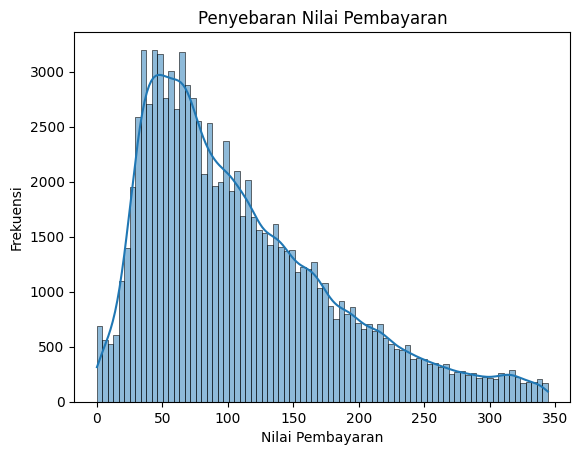

In [27]:
print("\nVisualisasi Penyebaran Nilai Pembayaran Setelah Dibersihkan:")
sns.histplot(cleaned_payments_df['payment_value'], kde=True)
plt.title("Penyebaran Nilai Pembayaran")
plt.xlabel("Nilai Pembayaran")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
Membersihkan outlier yang ada pada kolom 'payment_value'.

## Exploratory Data Analysis (EDA)

### Explore Tabel order_items_df

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
Index: 95092 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             95092 non-null  object 
 1   order_item_id        95092 non-null  int64  
 2   product_id           95092 non-null  object 
 3   seller_id            95092 non-null  object 
 4   shipping_limit_date  95092 non-null  object 
 5   price                95092 non-null  float64
 6   freight_value        95092 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.8+ MB
None

Statistik Deskriptif:
       order_item_id         price  freight_value
count   95092.000000  95092.000000   95092.000000
mean        1.205885     79.614581      15.884044
std         0.719299     56.195330       5.363266
min         1.000000      0.850000       0.980000
25%         1.000000     35.900000      12.690000
50%         1.000000     62.000000      

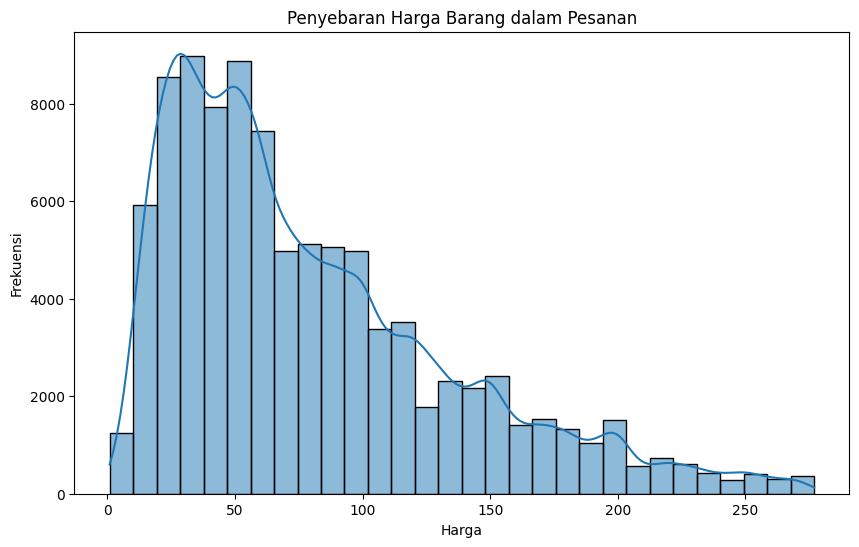

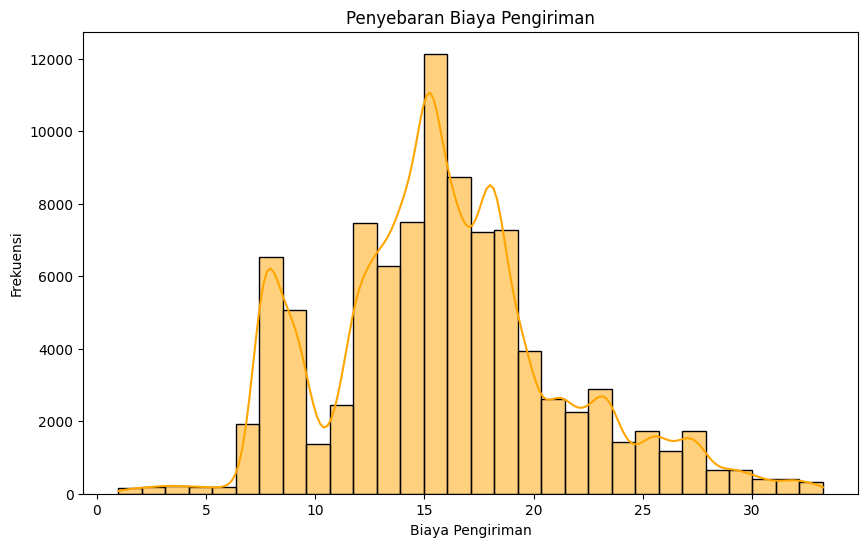


Statistik Berdasarkan Produk:
                          product_id  avg_price  max_price  min_price  \
0  00066f42aeeb9f3007548bb9d3f33c38     101.65     101.65     101.65   
1  00088930e925c41fd95ebfe695fd2655     129.90     129.90     129.90   
2  0009406fd7479715e4bef61dd91f2462     229.00     229.00     229.00   
3  000b8f95fcb9e0096488278317764d19      58.90      58.90      58.90   
4  000d9be29b5207b54e86aa1b1ac54872     199.00     199.00     199.00   

   avg_freight  
0        18.59  
1        13.93  
2        13.10  
3        19.60  
4        19.27  

Top 10 Produk dengan Harga Rata-Rata Tertinggi:
                              product_id  avg_price  max_price  min_price  \
16175  9680867d27bf4f20ac82adbe4dbae9ec     277.00     277.00     277.00   
17655  a42680488264322b4082817cfb32d64d     276.99     276.99     276.99   
21834  ca923b3bd6392830e4e7651fca0adfb4     276.99     276.99     276.99   
2888   1a26d40bdbef9cbc3e56226cb622f65e     275.93     275.93     275.93   
117

In [28]:
# Menampilkan Informasi Awal Data
print("Informasi Data:")
print(cleaned_order_items_df.info())

#Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(cleaned_order_items_df.describe())

# Statistik Kolom 'price' dan 'freight_value'
print("\nStatistik Harga (price):")
print(cleaned_order_items_df['price'].describe())
print("\nStatistik Biaya Pengiriman (freight_value):")
print(cleaned_order_items_df['freight_value'].describe())

# Visualisasi Distribusi Harga
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_order_items_df['price'], bins=30, kde=True)
plt.title('Penyebaran Harga Barang dalam Pesanan')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi Distribusi Biaya Pengiriman
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_order_items_df['freight_value'], bins=30, kde=True, color='orange')
plt.title('Penyebaran Biaya Pengiriman')
plt.xlabel('Biaya Pengiriman')
plt.ylabel('Frekuensi')
plt.show()

# Analisis Statistik Berdasarkan Produk
product_stats = cleaned_order_items_df.groupby('product_id').agg({
    'price': ['mean', 'max', 'min'],
    'freight_value': 'mean'
}).reset_index()
product_stats.columns = ['product_id', 'avg_price', 'max_price', 'min_price', 'avg_freight']
print("\nStatistik Berdasarkan Produk:\n", product_stats.head())

# Top 10 Produk Berdasarkan Rata-rata Harga
top_10_products = product_stats.sort_values('avg_price', ascending=False).head()
print("\nTop 10 Produk dengan Harga Rata-Rata Tertinggi:\n", top_10_products)


**Insight:**
- Barang yang dipesan didominasi dengan barang berharga rendah hingga menengah.
- Barang dengan harga tinggi memiliki porsi kecil tetapi berpotensi menjadi target pasar khusus.
- Produk dengan harga tinggi memiliki variasi biaya pengiriman yang signifikan, sehingga dapat dioptimalkan.

### Explore Tabel products_df

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32949 non-null  object 
 2   product_name_lenght         32949 non-null  float64
 3   product_description_lenght  32949 non-null  float64
 4   product_photos_qty          32949 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB
None
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32949.000000                32949.000000        32949.000000   
mean             47.580594               

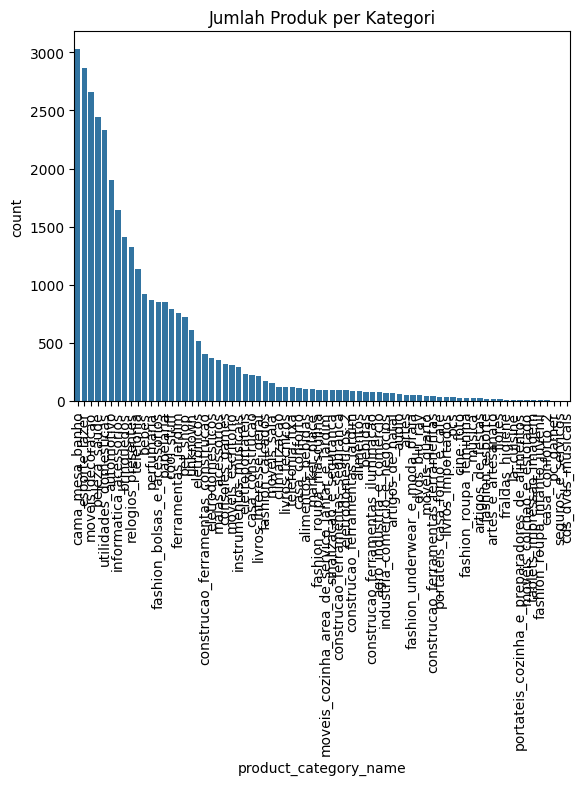

In [29]:
# Menampilkan Informasi Awal Data
print("Informasi Data:")
print(cleaned_products_df.info())

#Statistik Deskriptif
print(cleaned_products_df.describe())
print(cleaned_products_df['product_category_name'].value_counts())

#Visualisasi
sns.countplot(data=cleaned_products_df, x='product_category_name', order=cleaned_products_df['product_category_name'].value_counts().index)
plt.title('Jumlah Produk per Kategori')
plt.xticks(rotation=90)
plt.show()

**Insight:**
- Terdapat beberapa nilai ekstrem (outliers) pada dimensi produk, yang mungkin disebabkan oleh kesalahan input data.
- Beberapa kategori memiliki sangat sedikit produk
- Ada kemungkinan toko online lebih fokus pada kategori tertentu, sedangkan kategori kecil perlu diperhatikan untuk pengembangan produk.

### Explore Tabel reviews_df

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64
review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64


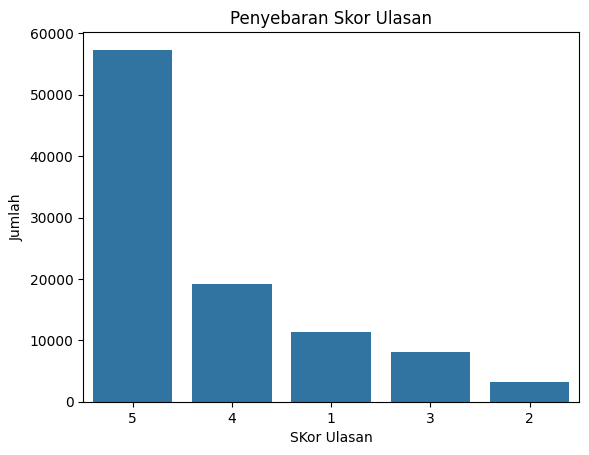

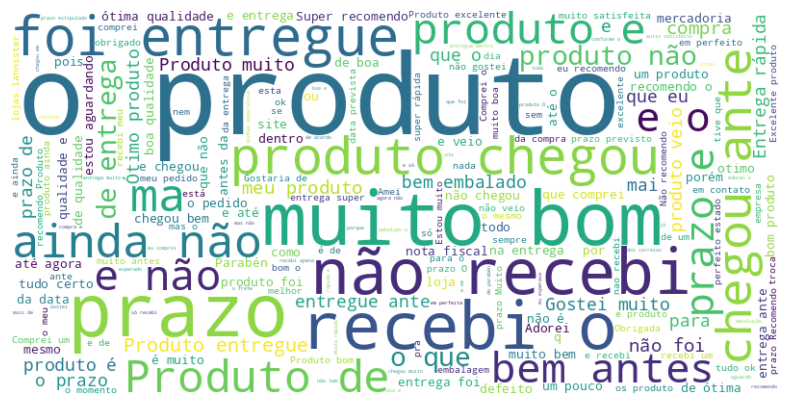


Deskripsi Statistik untuk Panjang Komentar:
count    99224.000000
mean        28.345622
std         48.369574
min          0.000000
25%          0.000000
50%          0.000000
75%         42.000000
max        208.000000
Name: review_comment_length, dtype: float64


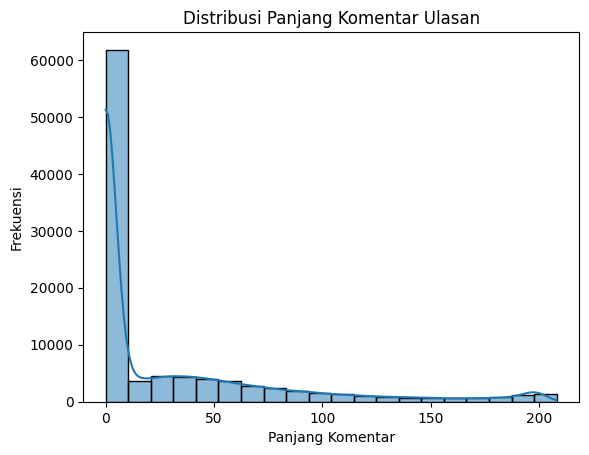

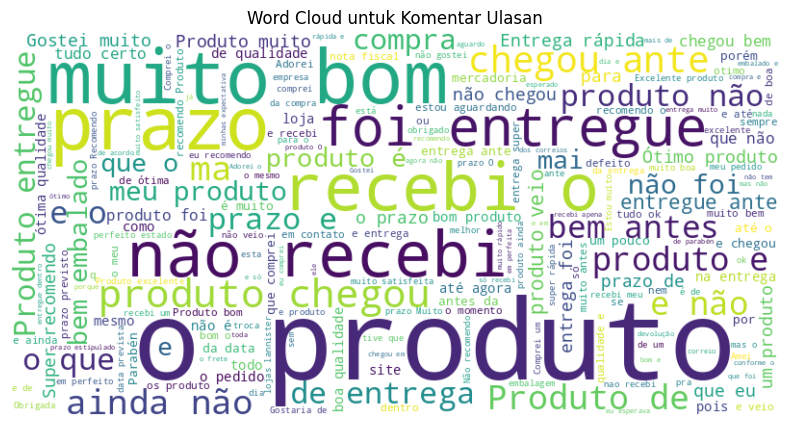

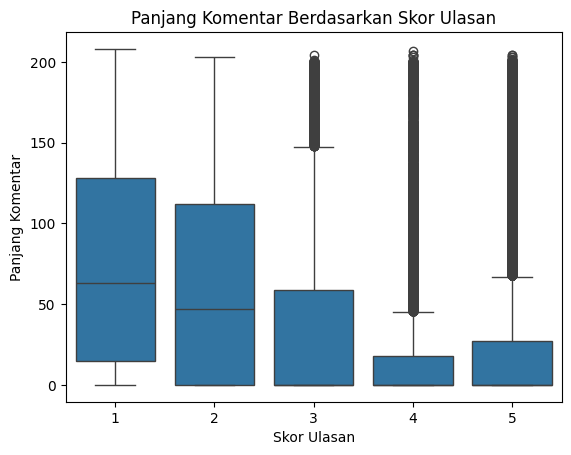


Proporsi Komentar Kosong: 0.00% (0/99224)


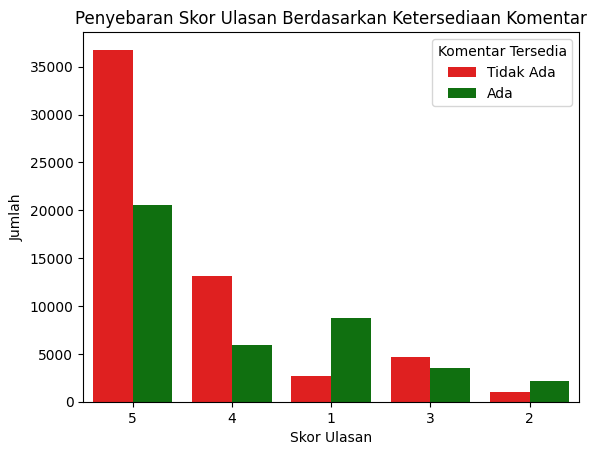

In [30]:
#Statistik Deskriptif
print(cleaned_reviews_df['review_score'].describe())
print(cleaned_reviews_df['review_score'].value_counts())

#Visualisasi
sns.countplot(data=cleaned_reviews_df, x='review_score', order=cleaned_reviews_df['review_score'].value_counts().index)
plt.title('Penyebaran Skor Ulasan')
plt.xlabel('SKor Ulasan')
plt.ylabel('Jumlah')
plt.show()

#Word Cloud
comment_txt = " ".join(review for review in cleaned_reviews_df['review_comment_message'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_txt)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Analisis Panjang Komentar Ulasan
cleaned_reviews_df['review_comment_length'] = cleaned_reviews_df['review_comment_message'].dropna().apply(len)

#Statistik Deskriptif untuk Panjang Komentar
print("\nDeskripsi Statistik untuk Panjang Komentar:")
print(cleaned_reviews_df['review_comment_length'].describe())

# Visualisasi Panjang Komentar
sns.histplot(cleaned_reviews_df['review_comment_length'], bins=20, kde=True)
plt.title('Distribusi Panjang Komentar Ulasan')
plt.xlabel('Panjang Komentar')
plt.ylabel('Frekuensi')
plt.show()

# Analisis Teks dengan Word Cloud (untuk Kolom review_comment_message)
review_text = " ".join(comment for comment in cleaned_reviews_df['review_comment_message'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(review_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Komentar Ulasan')
plt.show()

# Analisis Hubungan Skor Ulasan dengan Panjang Komentar
sns.boxplot(data=cleaned_reviews_df, x='review_score', y='review_comment_length')
plt.title('Panjang Komentar Berdasarkan Skor Ulasan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Panjang Komentar')
plt.show()

# Analisis Proporsi Komentar Kosong
empty_comments = cleaned_reviews_df['review_comment_message'].isna().sum()
total_reviews = len(cleaned_reviews_df)
empty_comment_percentage = (empty_comments / total_reviews) * 100
print(f"\nProporsi Komentar Kosong: {empty_comment_percentage:.2f}% ({empty_comments}/{total_reviews})")

# Visualisasi Skor Ulasan untuk Komentar Kosong dan Tidak Kosong
reviews_df['has_comment'] = reviews_df['review_comment_message'].notna()
sns.countplot(
    data=reviews_df,
    x='review_score',
    hue='has_comment',
    order=reviews_df['review_score'].value_counts().index,
    palette={False: 'red', True: 'green'}
)
plt.title('Penyebaran Skor Ulasan Berdasarkan Ketersediaan Komentar')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah')
plt.legend(title='Komentar Tersedia', labels=['Tidak Ada', 'Ada'])
plt.show()

**Insight:**
- Sebagian besar pelanggan puas dengan produk atau layanan yang diberikan.
- Ulasan negatif cenderung lebih informatif dan dapat digunakan untuk mengidentifikasi area perbaikan.


### Explore Tabel sellers_df

Informasi Umum Tabel sellers_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

Penyebaran Kode Pos Penjual:
seller_zip_code_prefix
14940    49
13660    10
13920     9
16200     9
87050     8
         ..
83707     1
85065     1
78552     1
3632      1
12051     1
Name: count, Length: 2246, dtype: int6

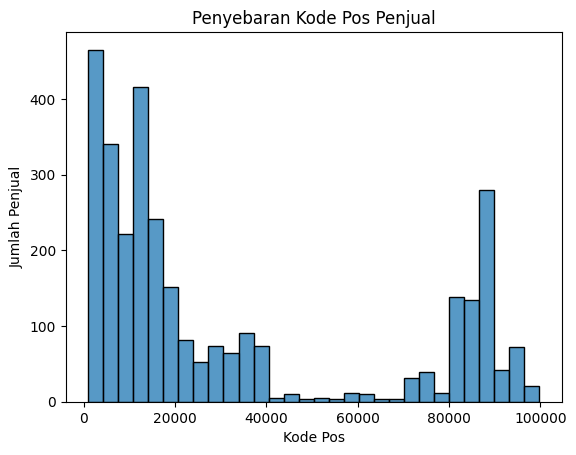


Top 10 Kota dengan Jumlah Penjual Terbanyak:
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64


<ipython-input-31-11cb9493697b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


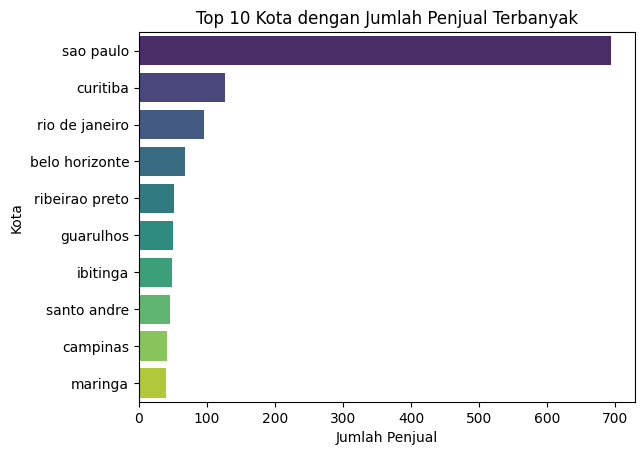


Penyebaran Penjual Berdasarkan Provinsi:
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


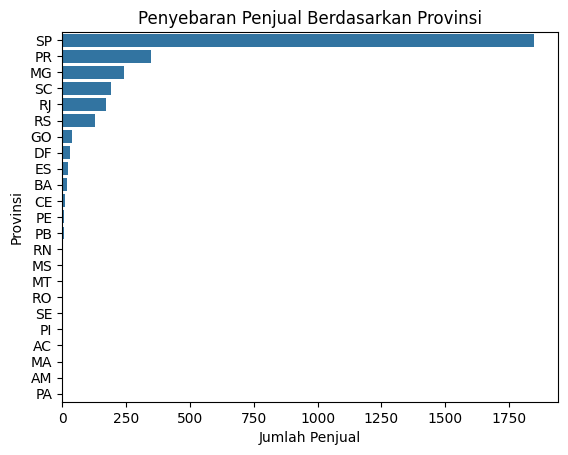

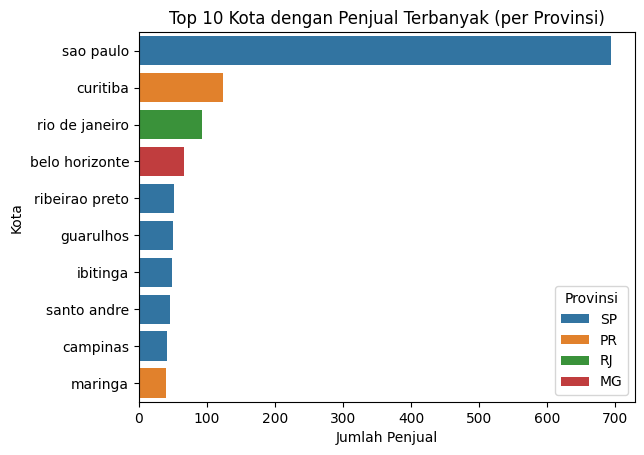

In [31]:
# Informasi Umum
print("Informasi Umum Tabel sellers_df:")
print(sellers_df.info())

#Statistik Deskriptif
print(sellers_df.describe())

# Penyebaran Kode Pos Penjual
print("\nPenyebaran Kode Pos Penjual:")
print(sellers_df['seller_zip_code_prefix'].value_counts())

sns.histplot(sellers_df['seller_zip_code_prefix'], bins=30, kde=False)
plt.title('Penyebaran Kode Pos Penjual')
plt.xlabel('Kode Pos')
plt.ylabel('Jumlah Penjual')
plt.show()

# Penyebaran Penjual Berdasarkan Kota
print("\nTop 10 Kota dengan Jumlah Penjual Terbanyak:")
print(sellers_df['seller_city'].value_counts().head(10))

sns.barplot(
    y=sellers_df['seller_city'].value_counts().head(10).index,
    x=sellers_df['seller_city'].value_counts().head(10),
    palette="viridis"
)
plt.title('Top 10 Kota dengan Jumlah Penjual Terbanyak')
plt.xlabel('Jumlah Penjual')
plt.ylabel('Kota')
plt.show()

# Penyebaran Penjual Berdasarkan Provinsi
print("\nPenyebaran Penjual Berdasarkan Provinsi:")
print(sellers_df['seller_state'].value_counts())

sns.countplot(data=sellers_df, y='seller_state', order=sellers_df['seller_state'].value_counts().index)
plt.title('Penyebaran Penjual Berdasarkan Provinsi')
plt.xlabel('Jumlah Penjual')
plt.ylabel('Provinsi')
plt.show()

# Visualisasi Gabungan Kota dan Provinsi
city_state = sellers_df.groupby(['seller_state', 'seller_city']).size().reset_index(name='count')
top_city_state = city_state.sort_values(by='count', ascending=False).head(10)

sns.barplot(data=top_city_state, x='count', y='seller_city', hue='seller_state', dodge=False)
plt.title('Top 10 Kota dengan Penjual Terbanyak (per Provinsi)')
plt.xlabel('Jumlah Penjual')
plt.ylabel('Kota')
plt.legend(title='Provinsi')
plt.show()

**Insight:**
- Distribusi kode pos menunjukkan bahwa sebagian besar penjual berada di lokasi spesifik dengan konsentrasi tinggi, meskipun ada penjual di wilayah yang lebih terpencil.
- Penjual lebih terkonsentrasi di kota-kota besar yang cenderung menjadi pusat ekonomi (seperti São Paulo).
- Provinsi dengan jumlah penjual rendah (seperti AC, MA, AM) dapat menjadi target potensial untuk memperluas jaringan distribusi.
- Strategi bisnis dapat difokuskan pada kota besar seperti São Paulo, Curitiba, dan Rio de Janeiro untuk memaksimalkan peluang usaha.

### Explore Tabel orders_df

Statistik Deskriptif untuk orders_df:
            order_purchase_timestamp              order_approved_at  \
count                          99441                          99441   
mean   2017-12-31 08:43:12.776581120  2017-12-03 13:35:07.539676672   
min              2016-09-04 21:15:19            1970-01-01 00:00:00   
25%              2017-09-12 14:46:19            2017-09-12 09:45:41   
50%              2018-01-18 23:04:36            2018-01-19 01:39:19   
75%              2018-05-04 15:42:16            2018-05-04 17:10:24   
max              2018-10-17 17:30:18            2018-09-03 17:40:06   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          99441                          99441   
mean   2017-02-24 11:40:50.281151744  2016-08-09 08:35:14.129111552   
min              1970-01-01 00:00:00            1970-01-01 00:00:00   
25%              2017-09-07 00:22:29            2017-09-11 18:11:36   
50%              2018-01-19 21:29:35  

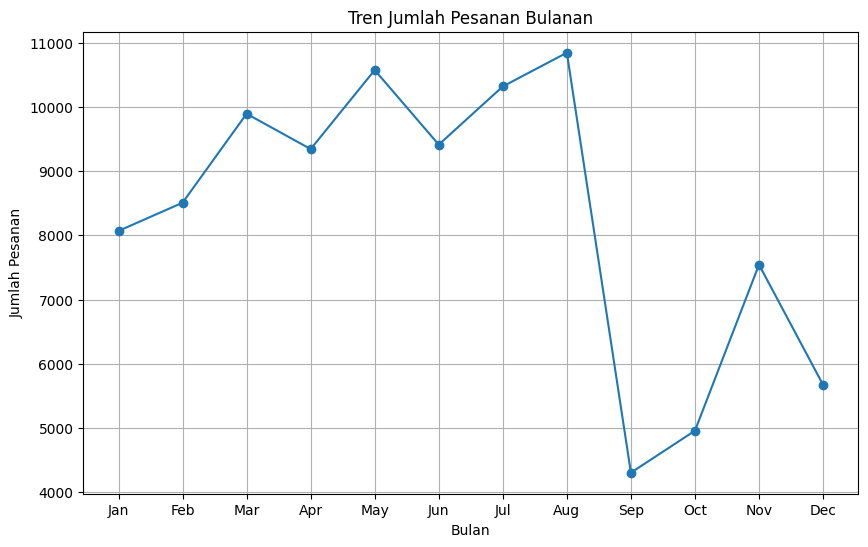

<ipython-input-32-005902c8b750>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_df, x='order_status', order=orders_df['order_status'].value_counts().index, palette='Set2')


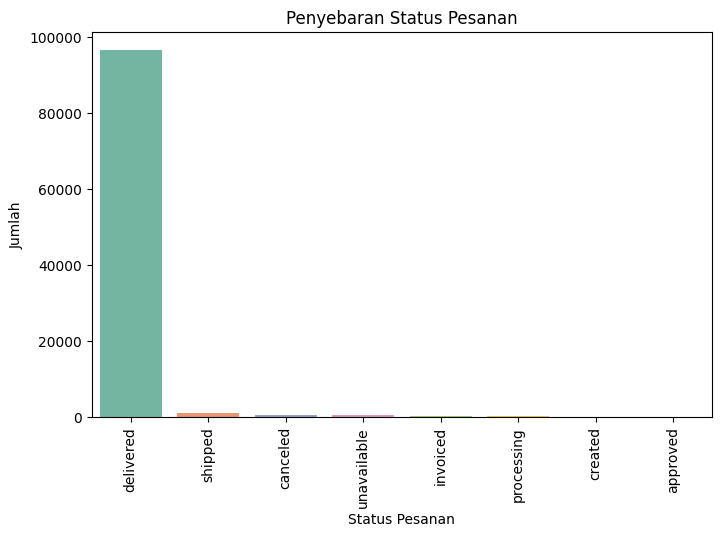

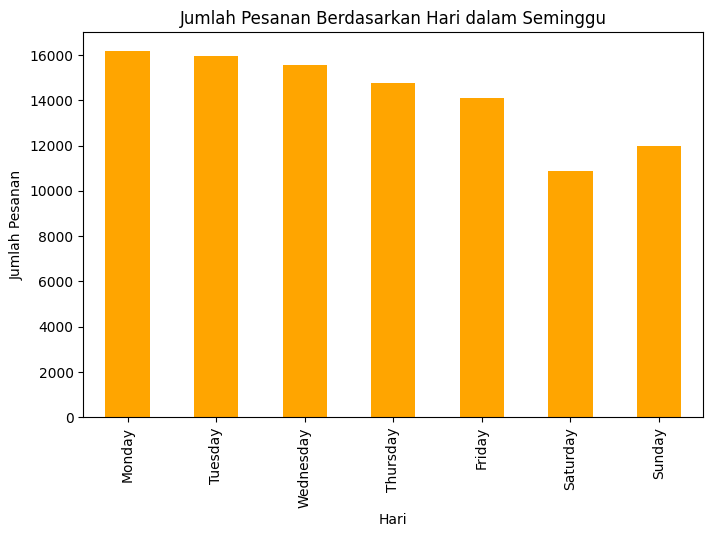


Jumlah Nilai Null di Tabel orders_df:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
month                            0
weekday                          0
dtype: int64


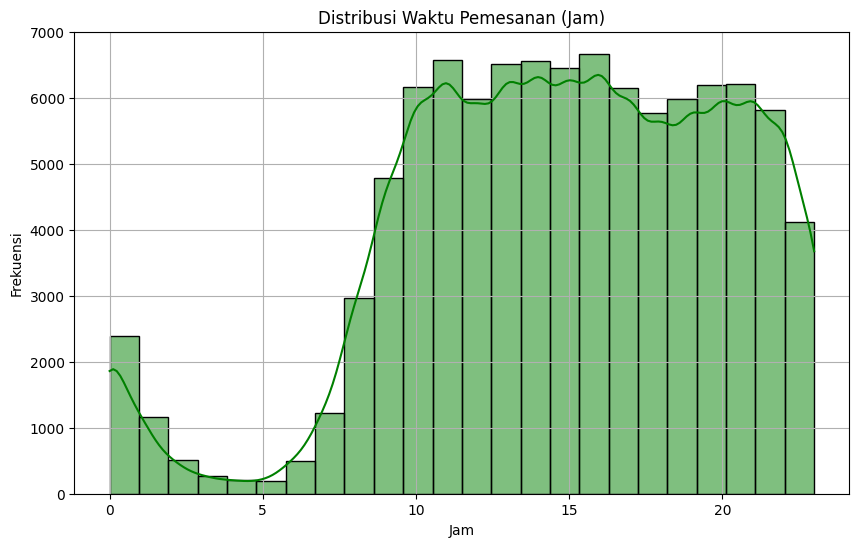

In [32]:
# Statistik Deskriptif
print("Statistik Deskriptif untuk orders_df:")
print(orders_df.describe())
print("\nStatus Pesanan (Order Status):")
print(orders_df['order_status'].value_counts())

# Buat Kolom Tambahan
orders_df['month'] = orders_df['order_purchase_timestamp'].dt.month
orders_df['weekday'] = orders_df['order_purchase_timestamp'].dt.day_name()

# Visualisasi Tren Pesanan Bulanan
orders_monthly = orders_df.groupby('month')['order_id'].count()
plt.figure(figsize=(10, 6))
orders_monthly.plot(kind='line', marker='o')
plt.title('Tren Jumlah Pesanan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Visualisasi Penyebaran Status Pesanan
plt.figure(figsize=(8, 5))
sns.countplot(data=orders_df, x='order_status', order=orders_df['order_status'].value_counts().index, palette='Set2')
plt.title('Penyebaran Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

# Visualisasi Tren Pesanan per Hari dalam Seminggu
orders_weekday = orders_df.groupby('weekday')['order_id'].count()
plt.figure(figsize=(8, 5))
orders_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='orange')
plt.title('Jumlah Pesanan Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=90)
plt.show()

# Memeriksa Nilai Null
print("\nJumlah Nilai Null di Tabel orders_df:")
print(orders_df.isnull().sum())

# Analisis Waktu Pemesanan
orders_df['hour'] = orders_df['order_purchase_timestamp'].dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(orders_df['hour'], bins=24, kde=True, color='green')
plt.title('Distribusi Waktu Pemesanan (Jam)')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**
- Tren musiman dapat digunakan untuk perencanaan stok dan pengelolaan logistik. Jika data menunjukkan puncak pesanan pada bulan tertentu, perusahaan dapat mempersiapkan inventaris atau promosi lebih baik di bulan tersebut.
- Tingginya jumlah "delivered" menunjukkan efektivitas sistem pengiriman.
- Dapat melakukan analisis lebih dalam mengenai alasan pembatalan (canceled) dan ketersediaan barang (unavailable) untuk meningkatkan kepuasan pelanggan.
- Pesanan cenderung lebih tinggi pada hari tertentu dalam seminggu (misalnya, akhir pekan atau awal minggu kerja). Hal ini dapat membantu dalam strategi pemasaran seperti diskon atau promosi yang ditargetkan pada hari-hari dengan potensi pesanan yang lebih tinggi.
- Sebagian besar pesanan dilakukan pada jam tertentu, mungkin pada jam kerja atau waktu senggang pelanggan. Hal ini dapat digunakan untuk mengoptimalkan kampanye iklan atau meningkatkan kapasitas dukungan pelanggan di jam-jam sibuk.

### Explore Tabel geoloc_df

Statistik Deskriptif:
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                738332.000000    738332.000000    738332.000000   
mean                  38316.086800       -20.998353       -46.461098   
std                   30632.496675         5.892315         4.393705   
min                    1001.000000       -36.605374      -101.466766   
25%                   12600.000000       -23.603061       -48.867822   
50%                   29144.000000       -22.873588       -46.647278   
75%                   65950.000000       -19.923336       -43.836974   
max                   99990.000000        45.065933       121.105394   

           frequency  
count  738332.000000  
mean        1.354625  
std         1.439927  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max       314.000000  

Jumlah Unik Lokasi per Provinsi:
geolocation_state
SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
SC   

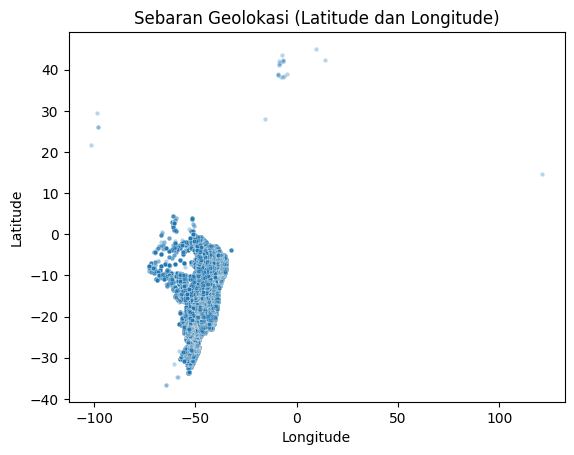

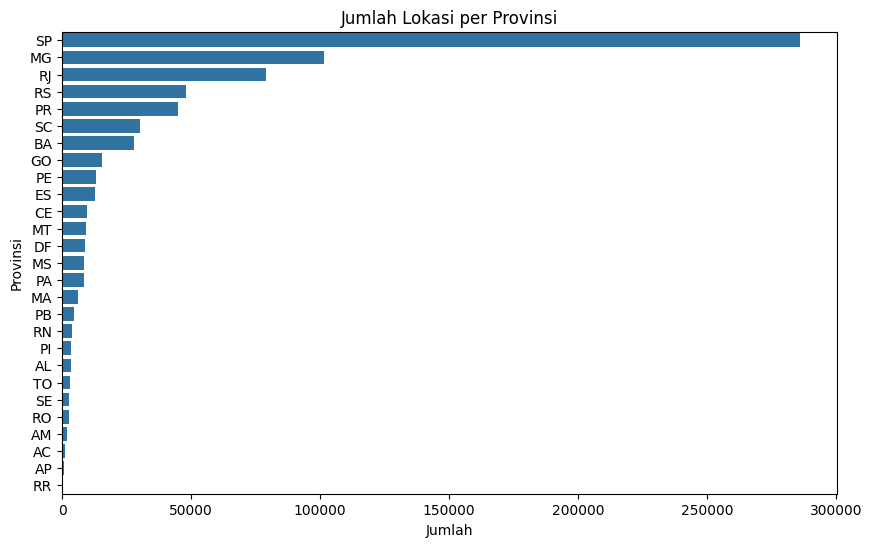

In [33]:
# Statistik Deskriptif
print("Statistik Deskriptif:")
print(geoloc_df.describe())

# Hitung Jumlah Unik Berdasarkan Kolom Provinsi
print("\nJumlah Unik Lokasi per Provinsi:")
print(geoloc_df['geolocation_state'].value_counts())

# Visualisasi Distribusi Lokasi (Latitude dan Longitude)
sns.scatterplot(data=geoloc_df, x='geolocation_lng', y='geolocation_lat', alpha=0.3, s=10)
plt.title('Sebaran Geolokasi (Latitude dan Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Visualisasi Distribusi Jumlah Lokasi per Provinsi
plt.figure(figsize=(10, 6))
sns.countplot(data=geoloc_df, y='geolocation_state', order=geoloc_df['geolocation_state'].value_counts().index)
plt.title('Jumlah Lokasi per Provinsi')
plt.xlabel('Jumlah')
plt.ylabel('Provinsi')
plt.show()

**Insight:**
- Penyebaran jumlah lokasi menunjukkan bahwa wilayah selatan dan tenggara Brasil (SP, MG, RJ) memiliki representasi data yang lebih besar dibandingkan wilayah utara.
- Wilayah dengan representasi rendah dapat menjadi fokus untuk analisis lebih lanjut atau pengembangan jaringan logistik dan layanan.

### Explore Tabel customers_df

Statistik Deskriptif:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Distribusi Lokasi Pelanggan (State):
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


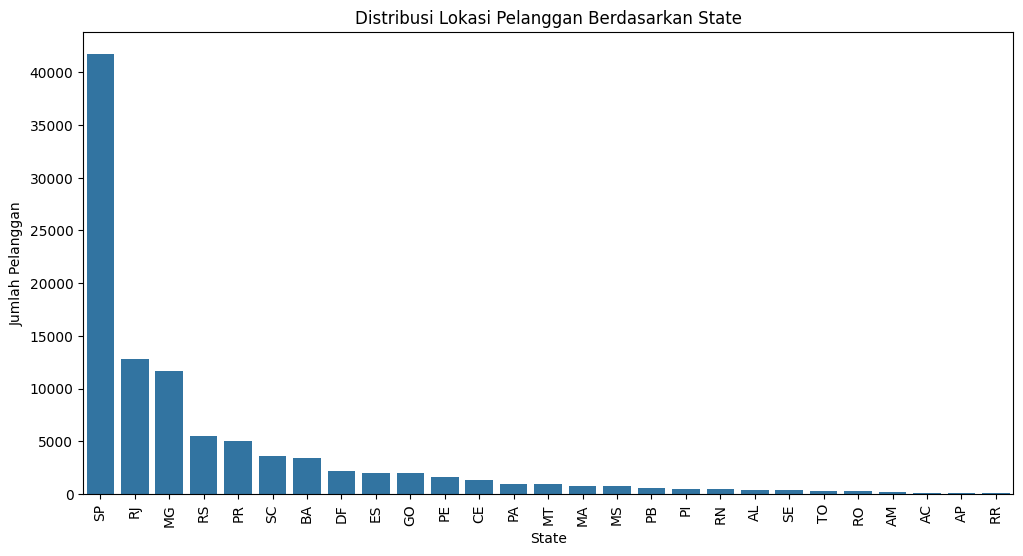

In [34]:
# Statistik Deskriptif
print("Statistik Deskriptif:")
print(customers_df.describe())

# Cek distribusi lokasi pelanggan berdasarkan state
print("\nDistribusi Lokasi Pelanggan (State):")
print(customers_df['customer_state'].value_counts())

# Visualisasi Distribusi Lokasi Pelanggan
plt.figure(figsize=(12, 6))
sns.countplot(data=customers_df, x='customer_state', order=customers_df['customer_state'].value_counts().index)
plt.title('Distribusi Lokasi Pelanggan Berdasarkan State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Jumlah Pelanggan')
plt.show()


**Insight:**
- Konsentrasi pelanggan terbesar berada di wilayah SP (São Paulo), yang merupakan pusat ekonomi Brasil. Hal ini bisa menjadi fokus utama untuk strategi pemasaran dan distribusi perusahaan.
- State dengan pelanggan terbatas (seperti RR, AP, dan AC) menunjukkan peluang untuk ekspansi, tetapi mungkin perlu mempertimbangkan biaya dan infrastruktur yang ada di wilayah tersebut.

### Explore Tabel payments_df

Statistik Deskriptif:
       payment_sequential  payment_installments  payment_value
count        95905.000000          95905.000000   95905.000000
mean             1.099546              2.628320     110.062133
std              0.734353              2.451581      72.785054
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      54.000000
50%              1.000000              1.000000      92.200000
75%              1.000000              3.000000     150.580000
max             29.000000             24.000000     344.340000

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
Index: 95905 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              95905 non-null  object 
 1   payment_sequential    95905 non-null  int64  
 2   payment_type          95905 non-null  object 
 3   payment_installments  95905 no

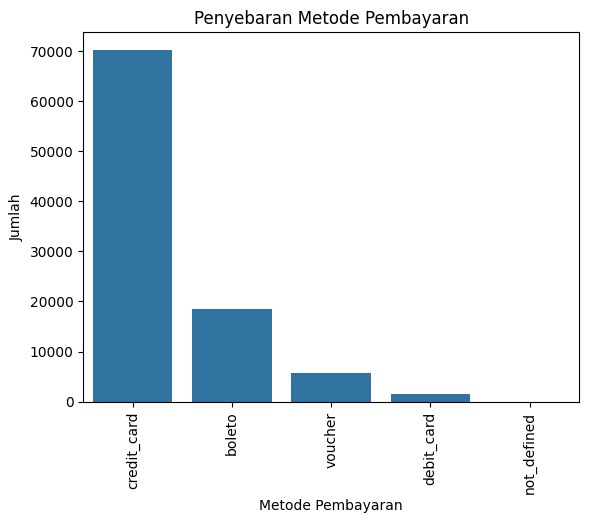

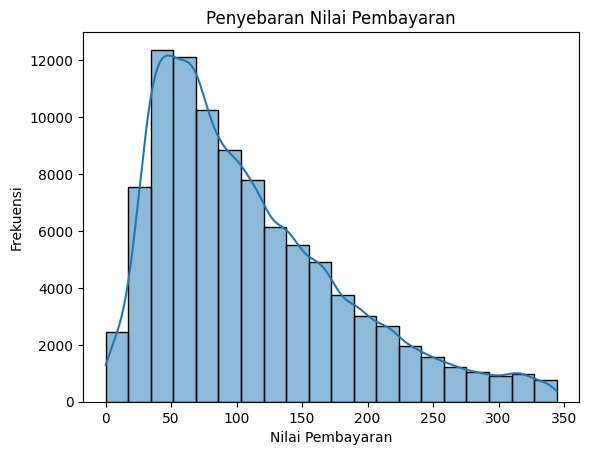

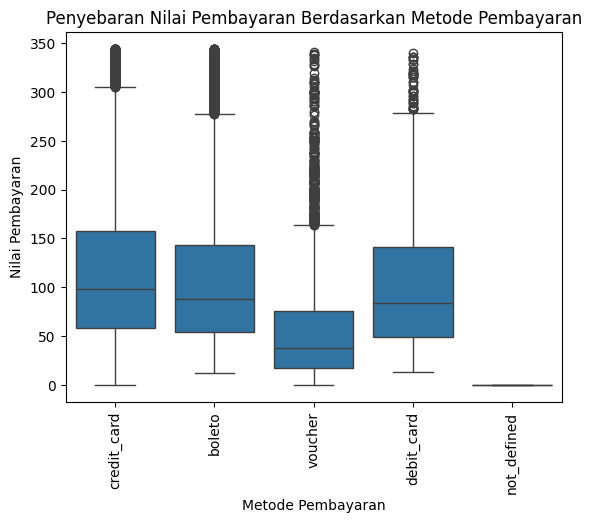


Rata-rata Nilai Pembayaran per Metode Pembayaran:
  payment_type  payment_value
0       boleto     106.975213
1  credit_card     115.396127
2   debit_card     104.050249
3  not_defined       0.000000
4      voucher      55.764396


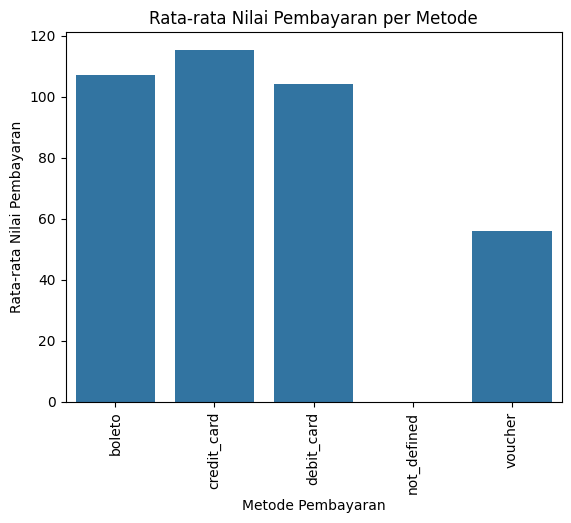

In [35]:
# Statistik Deskriptif
print("Statistik Deskriptif:")
print(cleaned_payments_df.describe())

# Informasi Data
print("\nInformasi Data:")
print(cleaned_payments_df.info())

# Penyebaran Metode Pembayaran
print("\nPenyebaran Metode Pembayaran:")
print(cleaned_payments_df['payment_type'].value_counts())

# Visualisasi Metode Pembayaran
sns.countplot(data=cleaned_payments_df, x='payment_type', order=cleaned_payments_df['payment_type'].value_counts().index)
plt.title('Penyebaran Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

# Penyebaran Nilai Pembayaran
sns.histplot(cleaned_payments_df['payment_value'], bins=20, kde=True)
plt.title('Penyebaran Nilai Pembayaran')
plt.xlabel('Nilai Pembayaran')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi Outlier dengan Boxplot
sns.boxplot(data=cleaned_payments_df, x='payment_type', y='payment_value')
plt.title('Penyebaran Nilai Pembayaran Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Nilai Pembayaran')
plt.xticks(rotation=90)
plt.show()

# Grupkan rata-rata nilai pembayaran per metode pembayaran
payment_method_avg = cleaned_payments_df.groupby('payment_type')['payment_value'].mean().reset_index()
print("\nRata-rata Nilai Pembayaran per Metode Pembayaran:")
print(payment_method_avg)

# Visualisasi Rata-rata Nilai Pembayaran
sns.barplot(data=payment_method_avg, x='payment_type', y='payment_value')
plt.title('Rata-rata Nilai Pembayaran per Metode')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-rata Nilai Pembayaran')
plt.xticks(rotation=90)
plt.show()

**Insight:**
- Mayoritas transaksi menggunakan metode credit card (73%) yang menunjukkan preferensi konsumen terhadap metode pembayaran yang cepat dan fleksibel.
- Metode seperti voucher (6%) dan debit card (1.5%) jauh lebih jarang digunakan.
- Nilai pembayaran 0 dapat menjadi indikasi data tidak valid atau transaksi khusus seperti promo.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa kategori produk dengan penjualan tertinggi berdasarkan jumlah item yang terjual?

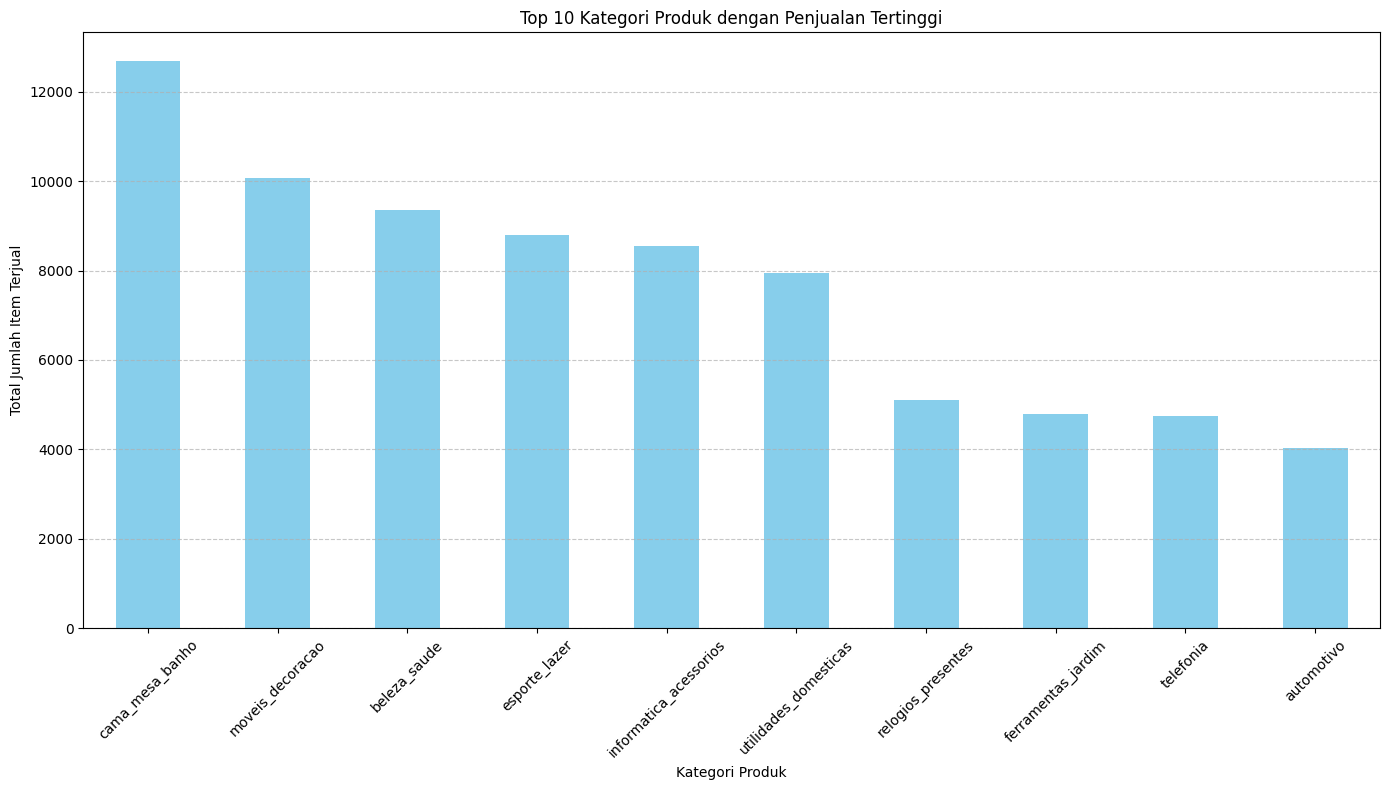

Top 10 Kategori Produk dengan Penjualan Tertinggi:
          Kategori Produk  Total Item Terjual
0         cama_mesa_banho               12695
1        moveis_decoracao               10078
2            beleza_saude                9363
3           esporte_lazer                8789
4  informatica_acessorios                8555
5   utilidades_domesticas                7949
6      relogios_presentes                5107
7      ferramentas_jardim                4781
8               telefonia                4750
9              automotivo                4035


In [36]:
product_sales = cleaned_order_items_df.merge(cleaned_products_df, on='product_id')
category_sales = product_sales.groupby('product_category_name')['order_item_id'].sum().sort_values(ascending=False)

# Menampilkan Kategori dengan Penjualan Tertinggi
plt.figure(figsize=(14, 8))
category_sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Kategori Produk dengan Penjualan Tertinggi')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Jumlah Item Terjual')
plt.xticks(rotation=45)
plt.yticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

top_categories = category_sales.head(10).reset_index()
top_categories.columns = ['Kategori Produk', 'Total Item Terjual']

print("Top 10 Kategori Produk dengan Penjualan Tertinggi:")
print(top_categories)


**Insight:**
- cama_mesa_banho (perlengkapan tempat tidur, meja, dan kamar mandi) menjadi kategori dengan penjualan tertinggi, yaitu sebanyak 12,695 item. Hal ini menunjukkan permintaan yang sangat tinggi untuk produk rumah tangga yang terkait dengan kenyamanan.
- Kategori seperti moveis_decoracao (furniture dan dekorasi) dan beleza_saude (kecantikan dan kesehatan) berada di posisi kedua dan ketiga. Hal ini dapat dijadikan peluang untuk memperluas penawaran atau meningkatkan promosi di sektor-sektor ini.
- Kategori seperti utilidades_domesticas (peralatan rumah tangga) menunjukkan penjualan yang stabil dengan 7,949 item terjual.
Kategori ini dapat diandalkan untuk memberikan pendapatan berkelanjutan dengan promosi rutin.

### Pertanyaan 2: Apa pola ulasan pelanggan terhadap pesanan dengan nilai bintang rendah?

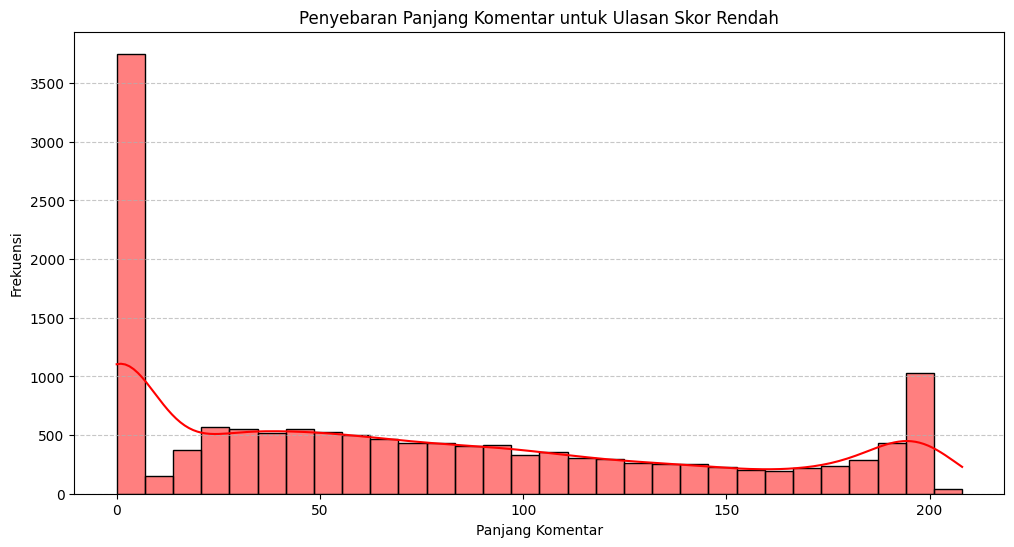

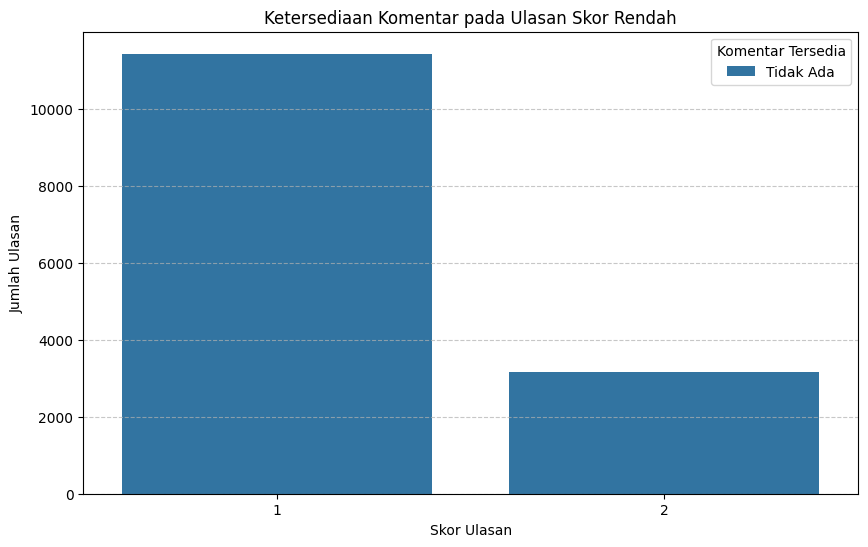

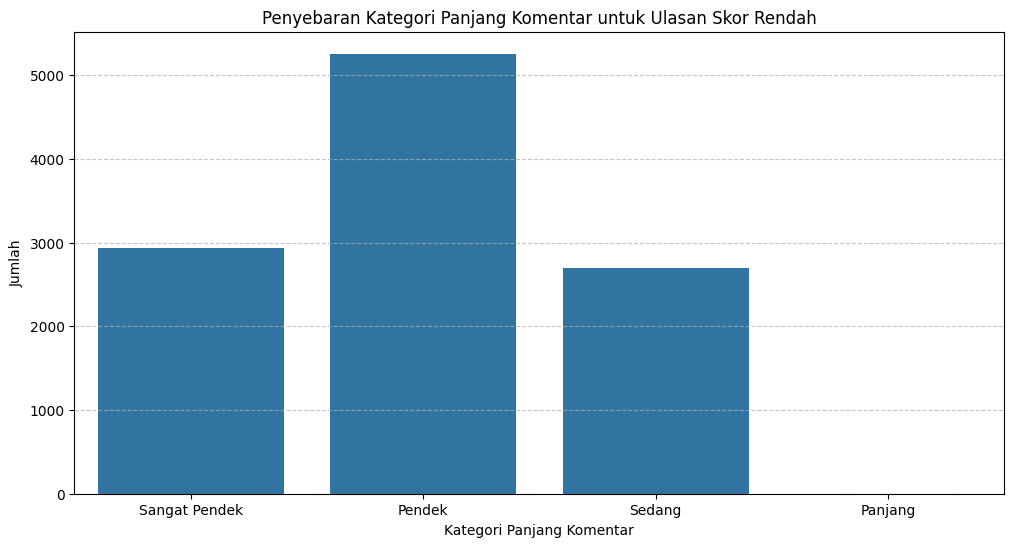

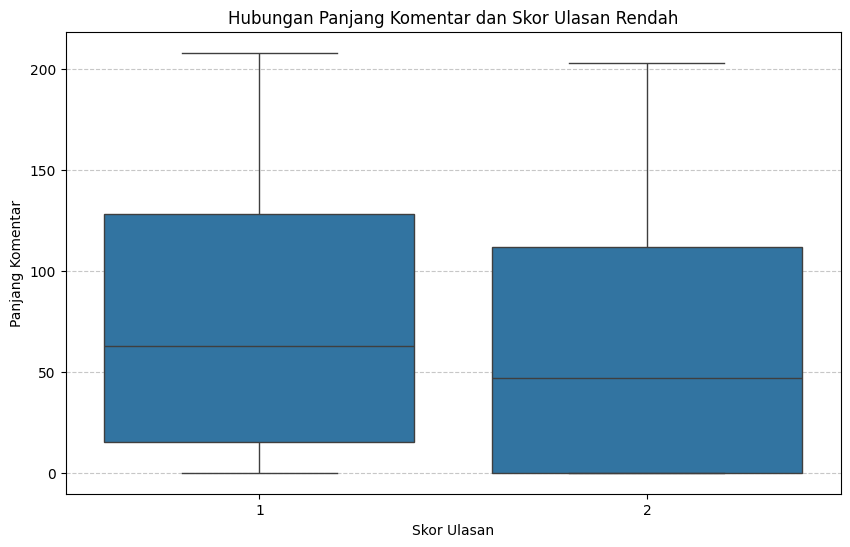

In [37]:
# Filter Ulasan dengan Skor Rendah
low_score_reviews = cleaned_reviews_df[cleaned_reviews_df['review_score'] <= 2].copy()

# Menambahkan Kolom Panjang Komentar
low_score_reviews.loc[:, 'comment_length'] = low_score_reviews['review_comment_message'].fillna('').apply(len)

# Visualisasi Penyebaran Panjang Komentar
plt.figure(figsize=(12, 6))
sns.histplot(low_score_reviews['comment_length'], bins=30, kde=True, color='red')
plt.title('Penyebaran Panjang Komentar untuk Ulasan Skor Rendah')
plt.xlabel('Panjang Komentar')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analisis Ketersediaan Komentar
low_score_reviews.loc[:, 'has_comment'] = low_score_reviews['review_comment_message'].notna()

# Visualisasi Ketersediaan Komentar
plt.figure(figsize=(10, 6))
sns.countplot(data=low_score_reviews, x='review_score')
plt.title('Ketersediaan Komentar pada Ulasan Skor Rendah')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.legend(title='Komentar Tersedia', labels=['Tidak Ada', 'Ada'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Penyebaran Ulasan Skor Rendah Berdasarkan Panjang Komentar
low_score_reviews.loc[:, 'comment_length_category'] = pd.cut(
    low_score_reviews['comment_length'],
    bins=[0, 50, 150, 300, 1000],
    labels=['Sangat Pendek', 'Pendek', 'Sedang', 'Panjang']
)

# Visualisasi Penyebaran Kategori Panjang Komentar
plt.figure(figsize=(12, 6))
sns.countplot(
    data=low_score_reviews,
    x='comment_length_category',
    order=['Sangat Pendek', 'Pendek', 'Sedang', 'Panjang']
)
plt.title('Penyebaran Kategori Panjang Komentar untuk Ulasan Skor Rendah')
plt.xlabel('Kategori Panjang Komentar')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Hubungan Antara Panjang Komentar dan Skor Ulasan
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=low_score_reviews,
    x='review_score',
    y='comment_length',
)
plt.title('Hubungan Panjang Komentar dan Skor Ulasan Rendah')
plt.xlabel('Skor Ulasan')
plt.ylabel('Panjang Komentar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight:**
- Pelanggan sering memberikan ulasan singkat untuk menyatakan ketidakpuasan mereka.
- Skor ulasan rendah dengan komentar panjang sering kali mencerminkan masalah yang lebih serius, karena pelanggan meluangkan waktu untuk menjelaskan pengalaman negatif mereka.

### Pertanyaan 3:  Siapa saja penjual dengan performa terbaik berdasarkan jumlah penjualan?

Top 10 Penjual dengan Performa Terbaik:
                             seller_id  total_items_sold  \
1109  6560211a19b47992c3666cc44a7e94c0              1975   
789   4a3ca9315b744ce9f8e9374361493884              1866   
324   1f50f920176fa81dab994f9023523100              1756   
2243  cc419e0650a3c5ba77189a1882b7556a              1736   
2387  da8622b14eb17ae2831f4ac5b9dab84a              1493   
1650  955fee9216a65b617aa5c0531780ce60              1276   
2560  ea8482cd71df3c1969d7b9473ff13abc              1158   
171   1025f0e2d44d7041d6cf58b6550e0bfa              1145   
1358  7a67c85e85bb2ce8582c35f2203ad736              1133   
654   3d871de0142ce09b7081e2b9d1733cb1              1046   

                seller_city seller_state  
1109              sao paulo           SP  
789                ibitinga           SP  
324   sao jose do rio preto           SP  
2243            santo andre           SP  
2387             piracicaba           SP  
1650              sao paulo           SP 

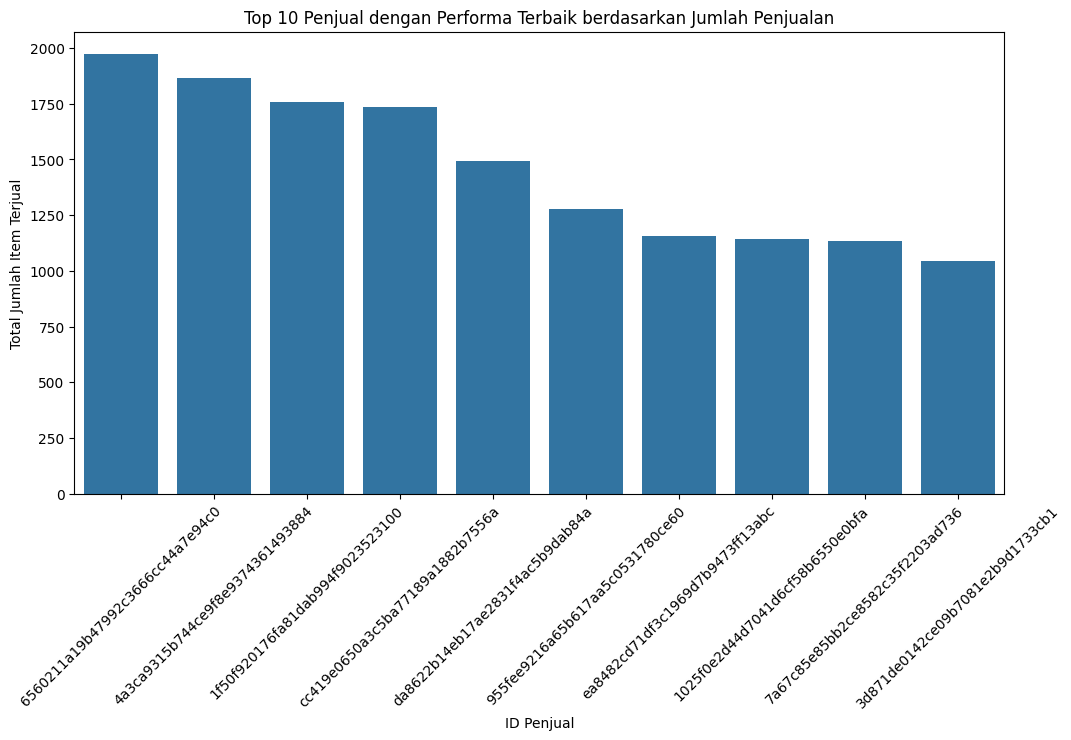

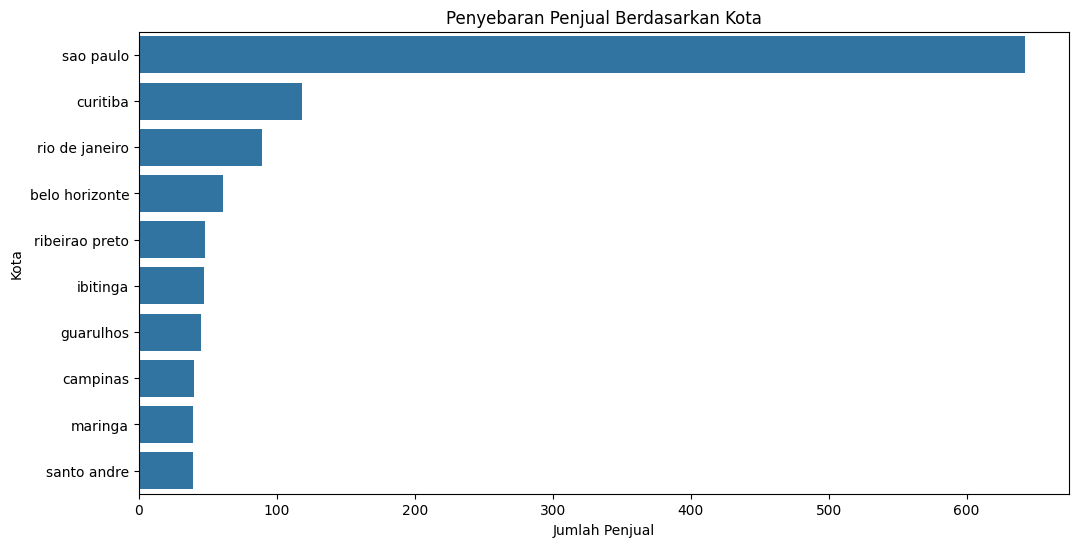

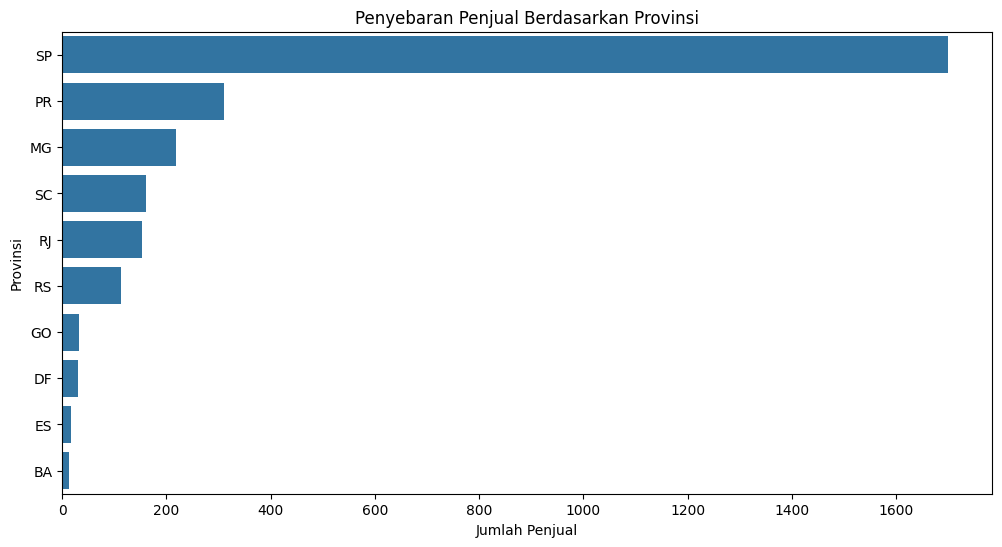

In [38]:
# Menghitung Total Jumlah Item Terjual per Penjual
seller_sales = cleaned_order_items_df.groupby('seller_id')['order_item_id'].count().reset_index()
seller_sales.rename(columns={'order_item_id': 'total_items_sold'}, inplace=True)

seller_performance = seller_sales.merge(sellers_df, on='seller_id')
top_sellers = seller_performance.sort_values('total_items_sold', ascending=False).head(10)

print("Top 10 Penjual dengan Performa Terbaik:")
print(top_sellers[['seller_id', 'total_items_sold', 'seller_city', 'seller_state']])

# Visualisasi Penjual Terbaik
plt.figure(figsize=(12, 6))
sns.barplot(data=top_sellers, x='seller_id', y='total_items_sold')
plt.title('Top 10 Penjual dengan Performa Terbaik berdasarkan Jumlah Penjualan')
plt.xlabel('ID Penjual')
plt.ylabel('Total Jumlah Item Terjual')
plt.xticks(rotation=45)
plt.show()

# Visualisasi Penyebaran Penjual Berdasarkan Kota
plt.figure(figsize=(12, 6))
sns.countplot(data=seller_performance, y='seller_city', order=seller_performance['seller_city'].value_counts().head(10).index)
plt.title('Penyebaran Penjual Berdasarkan Kota')
plt.xlabel('Jumlah Penjual')
plt.ylabel('Kota')
plt.show()

# Visualisasi Penyebaran Penjual Berdasarkan Provinsi
plt.figure(figsize=(12, 6))
sns.countplot(data=seller_performance, y='seller_state', order=seller_performance['seller_state'].value_counts().head(10).index)
plt.title('Penyebaran Penjual Berdasarkan Provinsi')
plt.xlabel('Jumlah Penjual')
plt.ylabel('Provinsi')
plt.show()


**Insight:**
- Penjual dengan ID 6560211a19b47992c3666cc44a7e94c0 adalah penjual dengan performa terbaik berdasarkan jumlah item yang terjual (1,975 item).
- 10 besar penjual memiliki total penjualan yang signifikan, yatu berkisar antara 1.046 hingga 1.975 item. Hal ini menunjukkan konsistensi dalam menarik pelanggan dan mempertahankan volume penjualan tinggi.
- Negara bagian SP (Sao Paulo) mendominasi jumlah penjual. Hal ini tidak hanya mencerminkan dominasi ekonomi wilayah ini, tetapi juga kemudahan akses terhadap layanan e-commerce.
- Kota-kota lain, meskipun lebih kecil jumlahnya, seperti Santo Andre atau Sao Jose do Rio Preto, masih menunjukkan kontribusi signifikan terhadap penjualan.

## Analisis Lanjutan (Opsional)

###Analisis RFM (Recency, Frequency, Monetary)

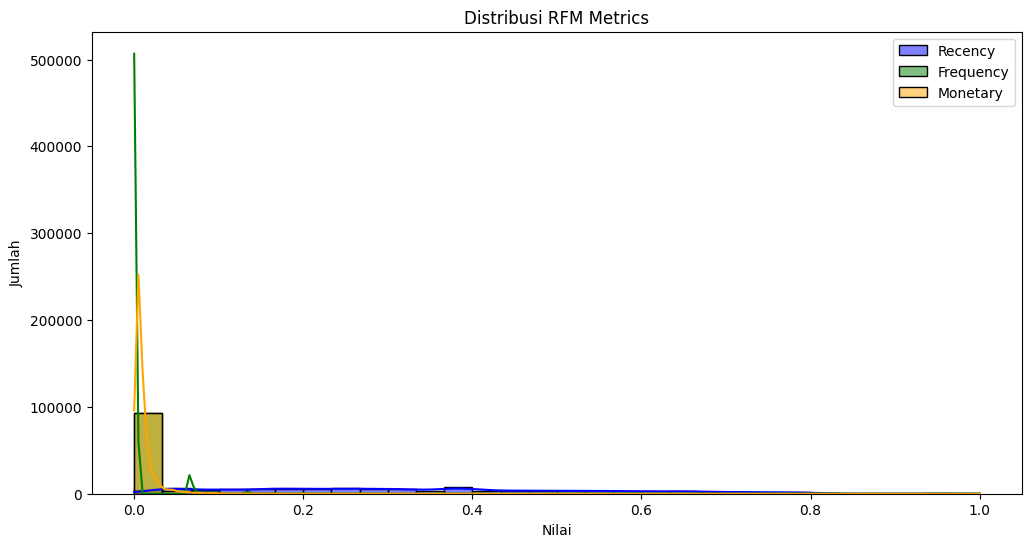

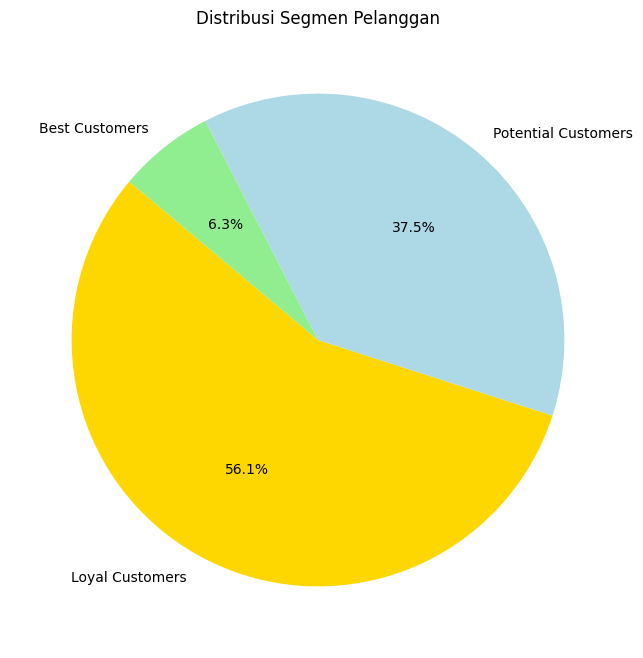

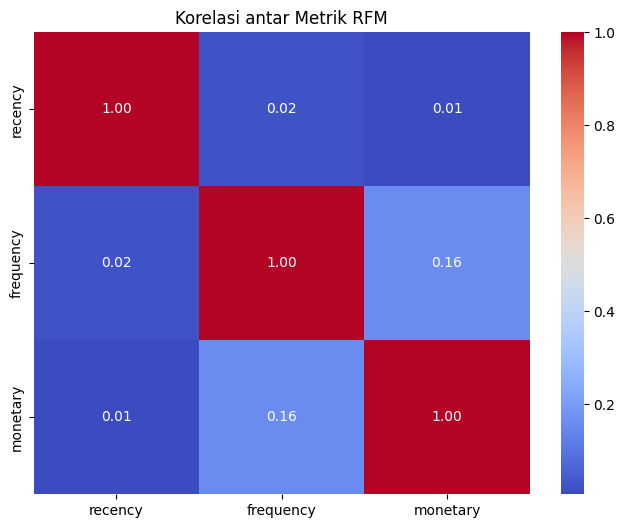

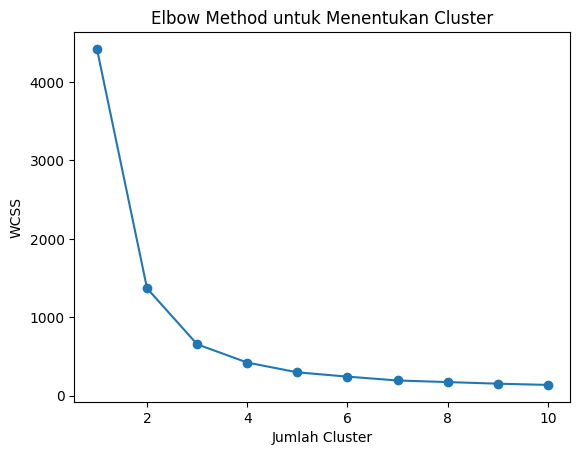

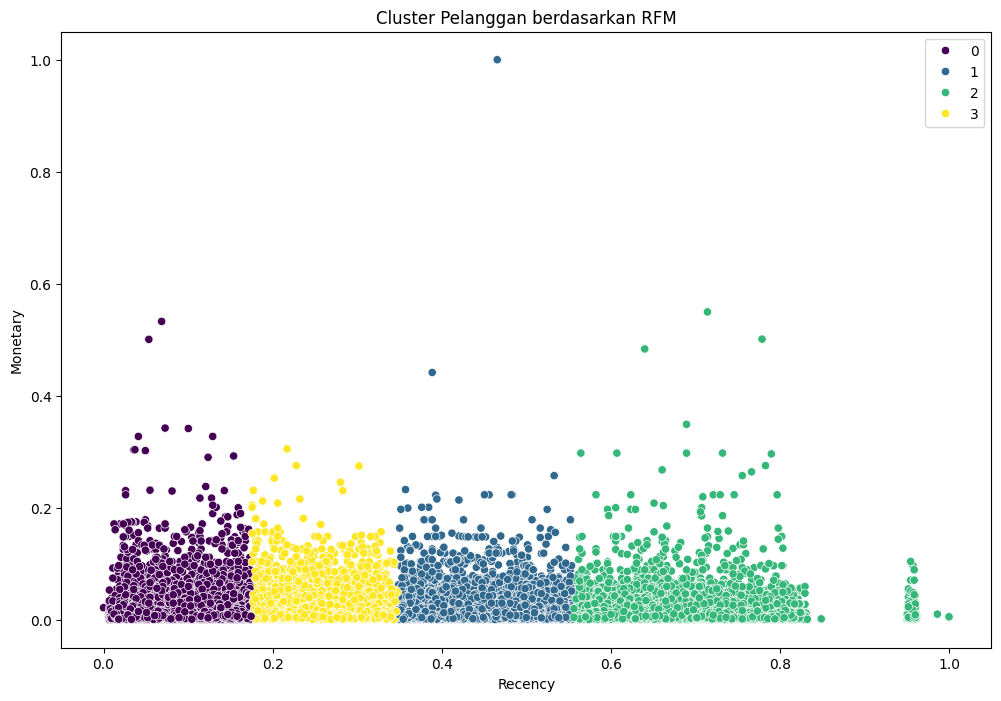

Hasil Deskriptif RFM:
            recency     frequency      monetary     RFM_score       cluster
count  97733.000000  97733.000000  97733.000000  97733.000000  97733.000000
mean       0.336216      0.004419      0.010809      5.988090      1.491165
std        0.210646      0.024169      0.016478      1.581948      1.167278
min        0.000000      0.000000      0.000000      3.000000      0.000000
25%        0.166209      0.000000      0.003575      5.000000      0.000000
50%        0.310440      0.000000      0.006626      6.000000      1.000000
75%        0.487637      0.000000      0.011835      7.000000      3.000000
max        1.000000      1.000000      1.000000     12.000000      3.000000

Analisis Segmentasi Pelanggan:
      customer_segment   recency  frequency  monetary  customer_count
0       Best Customers  0.631325   0.016637  0.028235            6183
1      Loyal Customers  0.403458   0.005174  0.013236           54874
2  Potential Customers  0.185859   0.001229  0.00424

In [39]:
# Menghitung Tanggal Terakhir Pembelian
latest_order_date = orders_df['order_purchase_timestamp'].max()

# Membuat metrik RFM
rfm = customers_df.merge(orders_df, on='customer_id').merge(order_items_df, on='order_id')

# Recency
rfm['order_purchase_timestamp'] = pd.to_datetime(rfm['order_purchase_timestamp'])
rfm['recency'] = (latest_order_date - rfm['order_purchase_timestamp']).dt.days

# Frequency
rfm_frequency = rfm.groupby('customer_unique_id')['order_id'].nunique().reset_index()
rfm_frequency.rename(columns={'order_id': 'frequency'}, inplace=True)

# Monetary
rfm_monetary = rfm.groupby('customer_unique_id')['price'].sum().reset_index()
rfm_monetary.rename(columns={'price': 'monetary'}, inplace=True)

# Menggabungkan RFM
rfm_combined = rfm[['customer_unique_id', 'recency']].drop_duplicates()
rfm_combined = rfm_combined.merge(rfm_frequency, on='customer_unique_id').merge(rfm_monetary, on='customer_unique_id')

# Normalisasi RFM
scaler = MinMaxScaler()
rfm_combined[['recency', 'frequency', 'monetary']] = scaler.fit_transform(rfm_combined[['recency', 'frequency', 'monetary']])

# Segmentasi Berdasarkan Kuantil dengan Validasi
def segment_metric(metric, q=4):
    try:
        return pd.qcut(metric, q=q, labels=range(1, q + 1), duplicates='drop')
    except ValueError:
        # Fallback jika data tidak cukup bervariasi
        return pd.cut(metric, bins=q, labels=range(1, q + 1), include_lowest=True)

rfm_combined['R_segment'] = segment_metric(rfm_combined['recency'], 4)
rfm_combined['F_segment'] = segment_metric(rfm_combined['frequency'], 4)
rfm_combined['M_segment'] = segment_metric(rfm_combined['monetary'], 4)

# Menghitung Skor RFM
rfm_combined['RFM_score'] = rfm_combined['R_segment'].astype(int) + rfm_combined['F_segment'].astype(int) + rfm_combined['M_segment'].astype(int)

# Menentukan Segmentasi Pelanggan
def assign_segment(score):
    if score >= 9:
        return 'Best Customers'
    elif score >= 6:
        return 'Loyal Customers'
    elif score >= 3:
        return 'Potential Customers'
    else:
        return 'At Risk'

rfm_combined['customer_segment'] = rfm_combined['RFM_score'].apply(assign_segment)

# Analisis Segmentasi Pelanggan
segment_analysis = rfm_combined.groupby('customer_segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customer_unique_id': 'count'
}).rename(columns={'customer_unique_id': 'customer_count'}).reset_index()

# Visualisasi Distribusi RFM Metrics
plt.figure(figsize=(12, 6))
sns.histplot(rfm_combined['recency'], bins=30, kde=True, color='blue', label='Recency')
sns.histplot(rfm_combined['frequency'], bins=30, kde=True, color='green', label='Frequency')
sns.histplot(rfm_combined['monetary'], bins=30, kde=True, color='orange', label='Monetary')
plt.title('Distribusi RFM Metrics')
plt.xlabel('Nilai')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

# Visualisasi Pie Chart Segmentasi Pelanggan
segment_counts = rfm_combined['customer_segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightgreen', 'salmon'])
plt.title('Distribusi Segmen Pelanggan')
plt.show()

# Visualisasi Korelasi antar Metrik RFM
correlation_matrix = rfm_combined[['recency', 'frequency', 'monetary']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Metrik RFM')
plt.show()

# Clustering dengan K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_combined[['recency', 'frequency', 'monetary']])
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method untuk Menentukan Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Menentukan Cluster
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_combined['cluster'] = kmeans.fit_predict(rfm_combined[['recency', 'frequency', 'monetary']])

# Visualisasi Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm_combined, x='recency', y='monetary', hue='cluster', palette='viridis')
plt.title('Cluster Pelanggan berdasarkan RFM')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

# Hasil RFM Analysis
print("Hasil Deskriptif RFM:")
print(rfm_combined.describe())

print("\nAnalisis Segmentasi Pelanggan:")
print(segment_analysis)

**Insight:**
- Mengelompokkan pelanggan ke dalam 4 segmen utama berdasarkan skor RFM, yaitu Best Customers (Skor RFM ≥ 9), Loyal Customers (6 ≤ Skor RFM < 9), Potential Customers (3 ≤ Skor RFM < 6), dan At Risk (di bawah 3).
- Sebagian besar pelanggan adalah low-frequency buyers yang membutuhkan strategi untuk meningkatkan frekuensi transaksi dan nilai pembelian.
- Korelasi antara Frequency dan Monetary tinggi. Hal ini menunjukkan pelanggan dengan frekuensi pembelian tinggi cenderung menghasilkan nilai monetari yang lebih besar.
- Recency memiliki korelasi negatif dengan Frequency dan Monetary. Hal ini menunjukkan pelanggan yang baru saja bertransaksi cenderung lebih aktif dan bernilai lebih tinggi.
- Cluster terbaik (Cluster 3) berisi pelanggan dengan nilai Monetary dan Frequency tinggi. Maka, dapat difokuskan untuk meningkatkan lifetime value pelanggan.
- Cluster terendah (Cluster 0) mencakup pelanggan dengan nilai RFM rendah yang menunjukkan potensi churn. Maka, dapat diterapkan strategi re-engagement.

###Analisis Geospatial

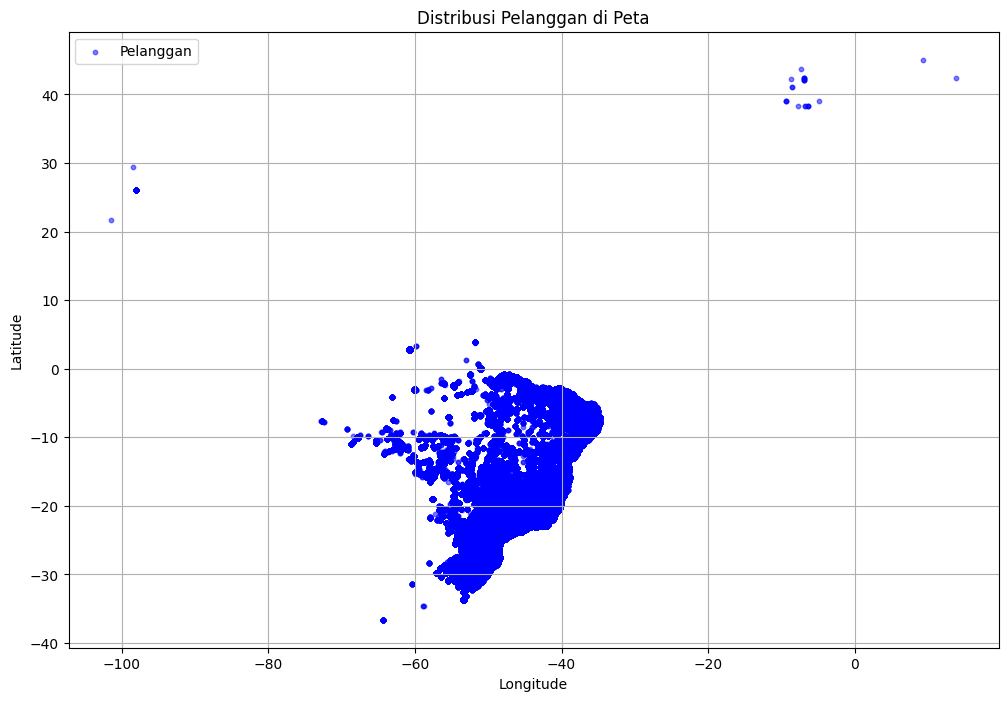

In [40]:
# Membuat DataFrame untuk lokasi pelanggan
customer_locations = customers_df.merge(geoloc_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# Memilih hanya kolom penting
customer_locations = customer_locations[['customer_unique_id', 'geolocation_lat', 'geolocation_lng']]

# Visualisasi Distribusi Pelanggan di Peta
plt.figure(figsize=(12, 8))
plt.scatter(customer_locations['geolocation_lng'], customer_locations['geolocation_lat'], alpha=0.5, c='blue', s=10, label='Pelanggan')
plt.title('Distribusi Pelanggan di Peta')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

**Insight:**
- Titik-titik yang lebih padat pada peta menunjukkan area dengan konsentrasi pelanggan yang lebih tinggi. Lokasi ini bisa menjadi indikasi bahwa area tersebut memiliki permintaan yang lebih besar atau lebih banyak pelanggan yang melakukan pembelian.

## Conclusion

Berdasarkan analisis data e-commerce di Brazil, beberapa kesimpulan penting dapat diambil untuk mendukung pengambilan keputusan strategis.

##1. Kategori Produk dengan Penjualan Tertinggi
Berdasarkan hasil analisis, terdapat kategori produk tertentu yang memiliki jumlah penjualan tertinggi. Informasi ini dapat dimanfaatkan untuk mengoptimalkan stok dan strategi pemasaran pada kategori tersebut.

##2. Pola Ulasan Pelanggan
Pola ulasan menunjukkan adanya bias pada skor ulasan pelanggan yang cenderung tinggi. Namun, ulasan dengan nilai rendah seringkali memberikan informasi yang lebih mendetail mengenai kekurangan produk atau layanan. Hal ini menunjukkan pentingnya meninjau ulasan rendah untuk perbaikan layanan.

##3. Performa Penjual Terbaik:
Penjual dengan performa terbaik diidentifikasi berdasarkan jumlah penjualan mereka. Pengetahuan ini dapat membantu perusahaan dalam merancang program loyalitas atau kolaborasi khusus dengan penjual yang berkontribusi besar terhadap penjualan keseluruhan.

##4. Analisis Geospasial:
Pemanfaatan analisis geospasial mengungkapkan area dengan konsentrasi pelanggan yang tinggi. Area ini berpotensi untuk menjadi fokus strategi pemasaran dan pengembangan layanan logistik yang lebih baik.

